# Importing the libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools
import pandas as pd
import random
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA

# Replicating the given model

* Input shape: (2)
* Hidden layers: 5 layers with *relu* as activation function. Each layer has 6 neurons
* Output: since it is a binary classification function the output will be 1 with sigmoid as activation function
* Loss function: Binary Cross Entropy
* Optimizer: Adam
* Metrics: Accuracy

In [2]:
#Setting the random seed
tf.random.set_seed(42)

#Replicating the model
replicate_model = tf.keras.Sequential([
    tf.keras.layers.InputLayer((2, )),
    tf.keras.layers.Dense(6, activation= 'relu'),
    tf.keras.layers.Dense(6, activation= 'relu'),
    tf.keras.layers.Dense(6, activation= 'relu'),
    tf.keras.layers.Dense(6, activation= 'relu'),
    tf.keras.layers.Dense(6, activation= 'relu'),
    tf.keras.layers.Dense(1, activation= 'sigmoid')
])

replicate_model.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                        optimizer= tf.keras.optimizers.Adam(),
                        metrics= ['accuracy'])

In [3]:
# Checking the summary of the model
replicate_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 18        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 6)                 42        
                                                                 
 dense_3 (Dense)             (None, 6)                 42        
                                                                 
 dense_4 (Dense)             (None, 6)                 42        
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 193
Trainable params: 193
Non-trainable pa

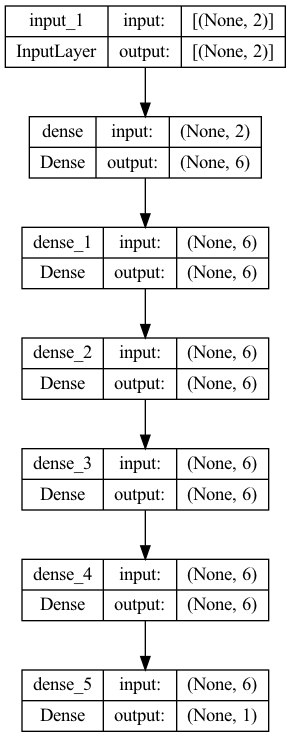

In [4]:
plot_model(replicate_model, show_shapes= True)

# Creating dataset for classifcation

In [5]:
X, y = make_moons(n_samples= 10000,
                  shuffle= True,
                  noise= 0.03,
                  random_state= 42)
X.shape, y.shape

((10000, 2), (10000,))

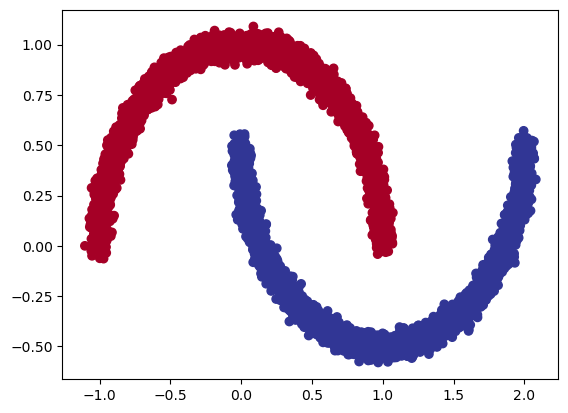

In [6]:
plt.scatter(X[:, 0], X[:, 1], c= y, cmap= plt.cm.RdYlBu)

# Creating a decision bounadry and confusion matrix function for easy visualisation of the model performance

In [7]:
def plot_decision_boundary(model, X, y):
    """
    PLots the decision boundary created by a model predicting on X.
    This function was inspired my two resources:
    1. https://cs231n.github.io/neural-networks-case-study/
    2. https://github.com/GokuMohandas/Made-With-ML
    """

    # Define the axis boundaries of the plot and create a meshgid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101),
                         np.linspace(y_min, y_max, 101))
    
    #Create X values
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2d arrays together

    # Make predictions
    y_pred = model.predict(x_in)

    # Check for multi-class
    if len(y_pred[0]) > 1:
        print("Doing multiclass classification")
        # We have to reshape our prediction to get them ready for plotting
        y_pred = np.argmax(y_pred, axis= 1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)

    plt.contourf(xx, yy, y_pred, cmap= plt.cm.RdYlBu, alpha= 0.8)
    plt.scatter(X[:, 0], X[:, 1], c= y, s= 40, cmap= plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

In [8]:
def plot_confusion_matrix(y_true, y_pred, classes= False, figsize= (10, 10), text_size= 15):
    '''
    Try it out by yourself by using y_true and y_pred as the parameters
    '''
    #Xreate the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis= 1)[:, np.newaxis]
    n_classes = cm.shape[0]

    # Let's pretify it
    fig, ax = plt.subplots(figsize= figsize)

    cax = ax.matshow(cm, cmap= plt.cm.Blues)
    fig.colorbar(cax)

    #Create classes

    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    #Label the axes
    ax.set(title= "Comnfusion Matrix",
        xlabel= "Predicted Label",
        ylabel= "True Label",
        xticks= np.arange(n_classes),
        yticks= np.arange(n_classes),
        xticklabels= labels,
        yticklabels= labels) 

    # Set axis labels to the bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    #Adjust label size
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    threshold = (cm.max() + cm.min()) / 2

    #Plot the tect on each cell
    for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)",
                horizontalalignment= "center", 
                color= "white" if cm[i, j] > threshold else "black",
                size= text_size)


# Splitting the data into training and test set

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [10]:
#Checking the shape of the dataset
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 2), (2000, 2), (8000,), (2000,))

# Creating model to classify the dataset

In [11]:
#Set the initial seed
tf.random.set_seed(42)

#Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation= 'sigmoid')
])

model_1.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(),
                metrics= ['accuracy'])

history_1 = model_1.fit(X_train, y_train,
            epochs= 100,
            validation_data= (X_test, y_test))

Epoch 1/100


  1/250 [..............................] - ETA: 35s - loss: 0.5557 - accuracy: 0.7812

2024-02-02 00:01:36.898837: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


250/250 [==============================] - 0s 696us/step - loss: 0.5125 - accuracy: 0.8378 - val_loss: 0.4666 - val_accuracy: 0.8870
Epoch 2/100
250/250 [==============================] - 0s 422us/step - loss: 0.4476 - accuracy: 0.8824 - val_loss: 0.4119 - val_accuracy: 0.9020
Epoch 3/100
250/250 [==============================] - 0s 414us/step - loss: 0.4038 - accuracy: 0.8798 - val_loss: 0.3730 - val_accuracy: 0.8935
Epoch 4/100
250/250 [==============================] - 0s 410us/step - loss: 0.3727 - accuracy: 0.8727 - val_loss: 0.3445 - val_accuracy: 0.8895
Epoch 5/100
250/250 [==============================] - 0s 399us/step - loss: 0.3498 - accuracy: 0.8685 - val_loss: 0.3231 - val_accuracy: 0.8880
Epoch 6/100
250/250 [==============================] - 0s 410us/step - loss: 0.3326 - accuracy: 0.8652 - val_loss: 0.3066 - val_accuracy: 0.8870
Epoch 7/100
250/250 [==============================] - 0s 404us/step - loss: 0.3194 - accuracy: 0.8630 - val_loss: 0.2936 - val_accuracy: 0.88

# Visualising the model performance

Graphs:
* Decision boundary
* Loss and Accuracy curve
* Confusion Matrix

## Decision Boundary

319/319 [==============================] - 0s 272us/step
doing binary classification


Text(0.5, 1.0, 'Model Prediction Decision boundary')

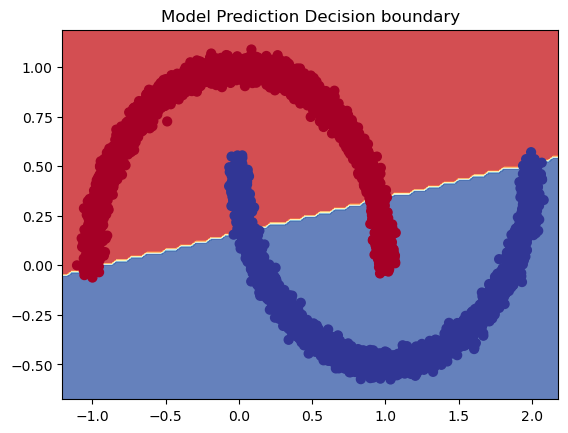

In [12]:
plot_decision_boundary(model= model_1,
                       X= X_train,
                       y= y_train)
plt.title("Model Prediction Decision boundary")

## Accuracy and loss curve

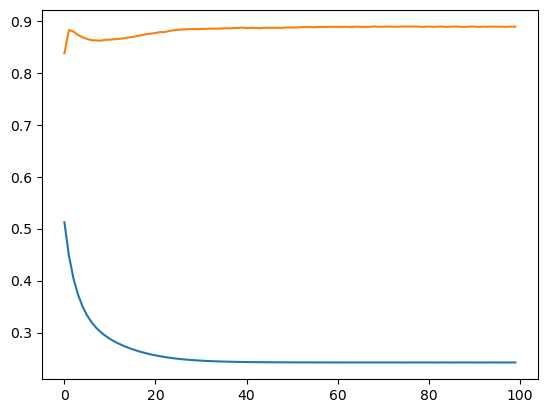

In [13]:
plt.plot(range(0, 100), history_1.history['loss'], label= 'Training loss Value')
plt.plot(range(0, 100), history_1.history['accuracy'], label= 'Training accuracy')


## Confusion Matrix

In [14]:
y_pred = model_1.predict(X_test)
tf.round(y_pred).shape, y_test.shape

 1/63 [..............................] - ETA: 0s

63/63 [==============================] - 0s 909us/step


(TensorShape([2000, 1]), (2000,))

In [15]:
tf.round(y_pred[0]), y_test[0]

(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>, 1)

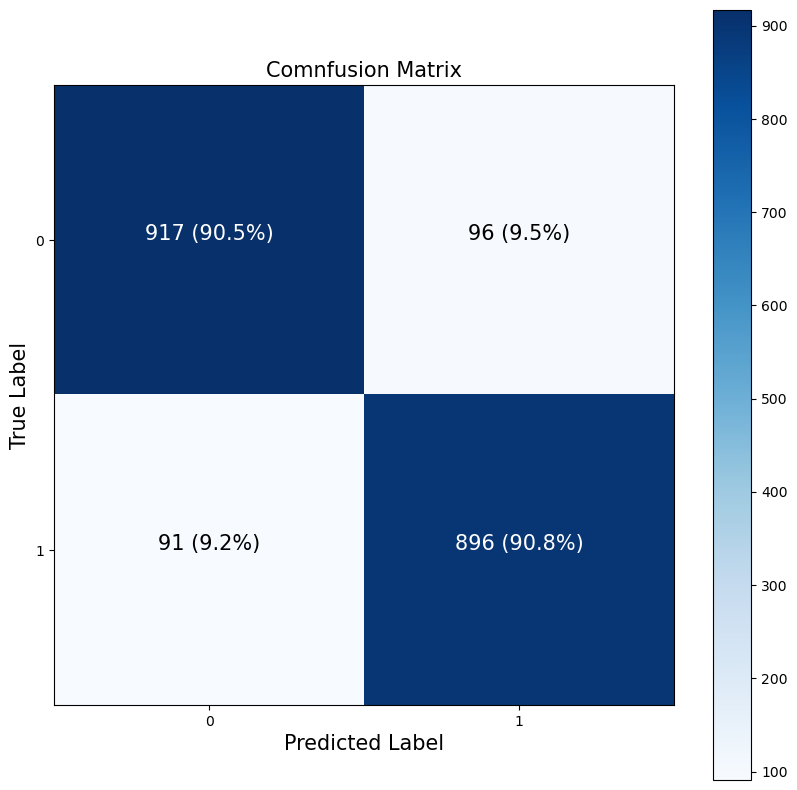

In [16]:
plot_confusion_matrix(y_test, tf.round(y_pred))

**Note**: Eventhough the training and testing accuracy is good but according to the decision boundary the model is not performing well

# Imporiving the model

Since our model is not performing in a non linear manner, we need to add some non linear activation function into our model.

Other improvements:
* Changing the learning rate
* Adding more layers
* Train for longer time

In [17]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation= 'relu'),
    tf.keras.layers.Dense(1, activation= 'sigmoid')
])

model_2.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(),
                metrics= ['accuracy'])

model_2.fit(X_train, y_train, epochs= 100)

Epoch 1/100


250/250 [==============================] - 0s 376us/step - loss: 0.5805 - accuracy: 0.7014
Epoch 2/100
250/250 [==============================] - 0s 392us/step - loss: 0.4422 - accuracy: 0.7794
Epoch 3/100
250/250 [==============================] - 0s 367us/step - loss: 0.3454 - accuracy: 0.8370
Epoch 4/100
250/250 [==============================] - 0s 299us/step - loss: 0.2965 - accuracy: 0.8619
Epoch 5/100
250/250 [==============================] - 0s 307us/step - loss: 0.2702 - accuracy: 0.8740
Epoch 6/100
250/250 [==============================] - 0s 305us/step - loss: 0.2567 - accuracy: 0.8830
Epoch 7/100
250/250 [==============================] - 0s 309us/step - loss: 0.2505 - accuracy: 0.8844
Epoch 8/100
250/250 [==============================] - 0s 301us/step - loss: 0.2474 - accuracy: 0.8871
Epoch 9/100
250/250 [==============================] - 0s 302us/step - loss: 0.2460 - accuracy: 0.8869
Epoch 10/100
250/250 [==============================] - 0s 294us/step - loss: 0.2452 

319/319 [==============================] - 0s 234us/step
doing binary classification


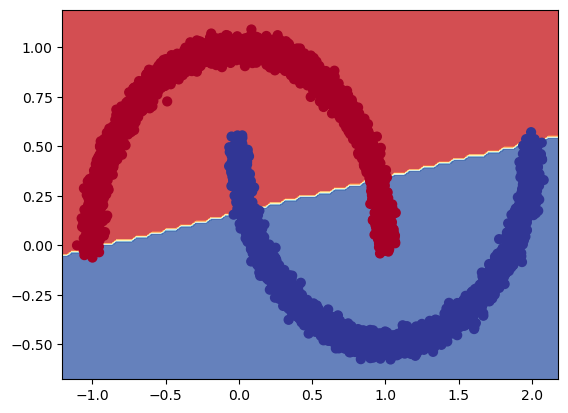

In [18]:
plot_decision_boundary(model= model_2,
                       X= X_train, 
                       y= y_train)

Add one more layer

In [19]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation= 'relu'),
    tf.keras.layers.Dense(5, activation= 'relu'),
    tf.keras.layers.Dense(1, activation= 'sigmoid')
])

model_3.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(),
                metrics= ['accuracy'])

model_3.fit(X_train, y_train, epochs= 100)

Epoch 1/100


250/250 [==============================] - 0s 391us/step - loss: 0.5944 - accuracy: 0.7506
Epoch 2/100
250/250 [==============================] - 0s 344us/step - loss: 0.3458 - accuracy: 0.8885
Epoch 3/100
250/250 [==============================] - 0s 422us/step - loss: 0.2426 - accuracy: 0.8901
Epoch 4/100
250/250 [==============================] - 0s 344us/step - loss: 0.2160 - accuracy: 0.8923
Epoch 5/100
250/250 [==============================] - 0s 519us/step - loss: 0.2055 - accuracy: 0.8905
Epoch 6/100
250/250 [==============================] - 0s 396us/step - loss: 0.2004 - accuracy: 0.8928
Epoch 7/100
250/250 [==============================] - 0s 317us/step - loss: 0.1979 - accuracy: 0.8941
Epoch 8/100
250/250 [==============================] - 0s 311us/step - loss: 0.1961 - accuracy: 0.8925
Epoch 9/100
250/250 [==============================] - 0s 340us/step - loss: 0.1951 - accuracy: 0.8929
Epoch 10/100
250/250 [==============================] - 0s 356us/step - loss: 0.1937 

319/319 [==============================] - 0s 254us/step
doing binary classification


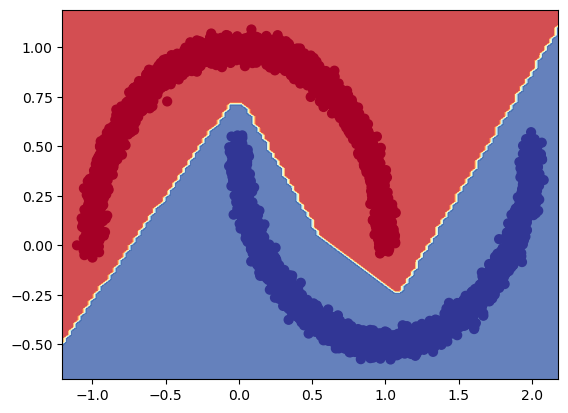

In [20]:
plot_decision_boundary(model_3, X_train, y_train)

Addition of another layer didn't help much to the model therefore removing the layer.

Will other activation function help?

In [21]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation= 'tanh'),
    tf.keras.layers.Dense(1, activation= 'sigmoid')
])

model_4.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(),
                metrics= ['accuracy'])

history_4 = model_4.fit(X_train, y_train, epochs= 100, validation_data=(X_test, y_test))

Epoch 1/100
250/250 [==============================] - 0s 741us/step - loss: 0.8296 - accuracy: 0.4033 - val_loss: 0.6511 - val_accuracy: 0.6985
Epoch 2/100
250/250 [==============================] - 0s 519us/step - loss: 0.5294 - accuracy: 0.8281 - val_loss: 0.4249 - val_accuracy: 0.9045
Epoch 3/100
250/250 [==============================] - 0s 386us/step - loss: 0.3834 - accuracy: 0.8795 - val_loss: 0.3254 - val_accuracy: 0.8940
Epoch 4/100
250/250 [==============================] - 0s 384us/step - loss: 0.3204 - accuracy: 0.8737 - val_loss: 0.2787 - val_accuracy: 0.8925
Epoch 5/100
250/250 [==============================] - 0s 392us/step - loss: 0.2899 - accuracy: 0.8754 - val_loss: 0.2538 - val_accuracy: 0.8945
Epoch 6/100
250/250 [==============================] - 0s 385us/step - loss: 0.2731 - accuracy: 0.8806 - val_loss: 0.2395 - val_accuracy: 0.8985
Epoch 7/100
250/250 [==============================] - 0s 385us/step - loss: 0.2634 - accuracy: 0.8838 - val_loss: 0.2310 - val_ac

319/319 [==============================] - 0s 239us/step
doing binary classification


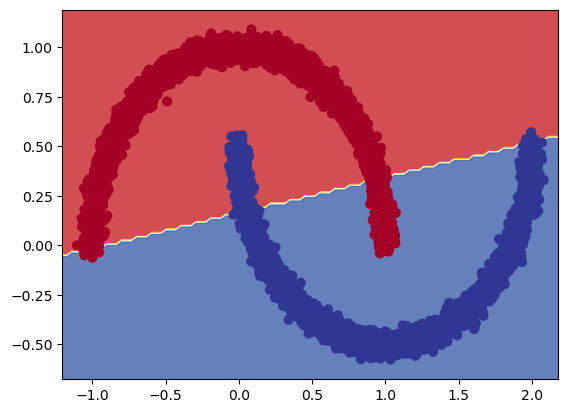

In [22]:
plot_decision_boundary(model_4, X_train, y_train)

The change in activation function helped a lot and is performing very well

Let's evaluate to other metrics also

 1/63 [..............................] - ETA: 0s

63/63 [==============================] - 0s 287us/step


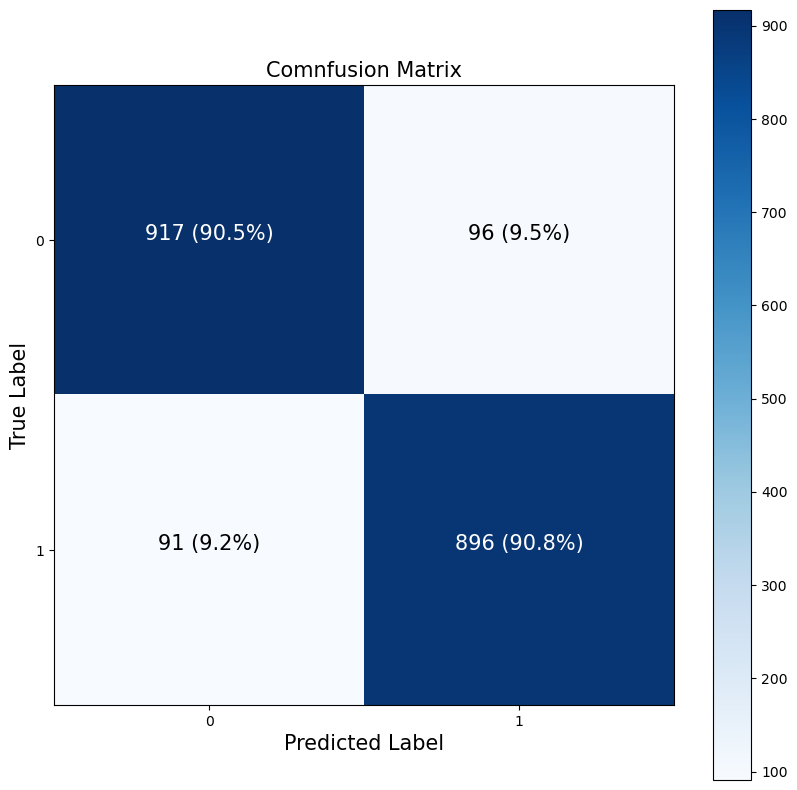

In [23]:
plot_confusion_matrix(y_test, 
                      tf.round(model_4.predict(X_test)))

According to the confusion matrix the model is performing outstanding.

Let's see if we can optimize the model by tweaking the learning rate

<Axes: >

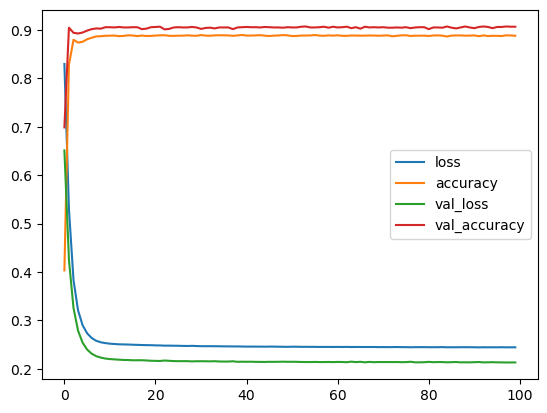

In [24]:
pd.DataFrame(history_4.history).plot()

## Looking for the optimal learning rate

In [25]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation= 'tanh'),
    tf.keras.layers.Dense(1, activation= 'sigmoid')
])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (epoch / 20))

model_5.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics= ['accuracy'])

history_5 = model_5.fit(X_train, y_train, epochs= 100, validation_data= (X_test, y_test), callbacks= [lr_scheduler])

Epoch 1/100
250/250 [==============================] - 0s 663us/step - loss: 0.5048 - accuracy: 0.8291 - val_loss: 0.4843 - val_accuracy: 0.8435 - lr: 1.0000e-04
Epoch 2/100
250/250 [==============================] - 0s 401us/step - loss: 0.4828 - accuracy: 0.8289 - val_loss: 0.4608 - val_accuracy: 0.8450 - lr: 1.1220e-04
Epoch 3/100
250/250 [==============================] - 0s 397us/step - loss: 0.4606 - accuracy: 0.8292 - val_loss: 0.4369 - val_accuracy: 0.8450 - lr: 1.2589e-04
Epoch 4/100
250/250 [==============================] - 0s 402us/step - loss: 0.4383 - accuracy: 0.8296 - val_loss: 0.4129 - val_accuracy: 0.8470 - lr: 1.4125e-04
Epoch 5/100
250/250 [==============================] - 0s 395us/step - loss: 0.4163 - accuracy: 0.8304 - val_loss: 0.3894 - val_accuracy: 0.8505 - lr: 1.5849e-04
Epoch 6/100
250/250 [==============================] - 0s 407us/step - loss: 0.3949 - accuracy: 0.8324 - val_loss: 0.3666 - val_accuracy: 0.8530 - lr: 1.7783e-04
Epoch 7/100
250/250 [=======

Text(0.5, 1.0, 'Learning rate vs Loss Value')

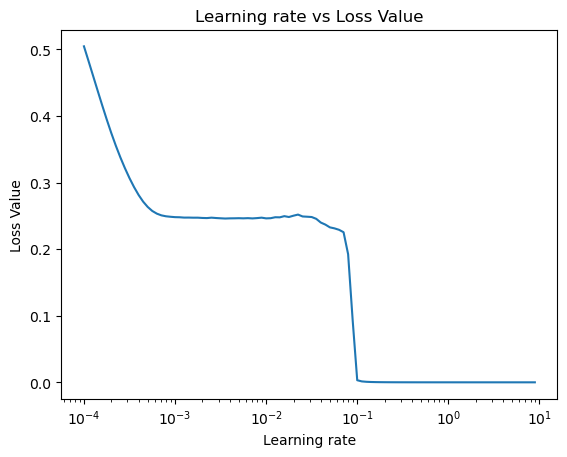

In [26]:
# Plot learning rate vs loss curve
lrs= history_5.history['lr']
plt.semilogx(lrs, history_5.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('Loss Value')
plt.title("Learning rate vs Loss Value")

In [27]:
8e-4, 6e-3

(0.0008, 0.006)

Let's try for the above learning rate value and compare for 20 epochs

In [28]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation= 'tanh'),
    tf.keras.layers.Dense(1, activation= 'sigmoid')
])

model_6.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(learning_rate= 8e-4),
                metrics= ['accuracy'])

history_6 = model_6.fit(X_train, y_train, epochs= 20, validation_data=(X_test, y_test))

Epoch 1/20


250/250 [==============================] - 0s 667us/step - loss: 0.6183 - accuracy: 0.6804 - val_loss: 0.4981 - val_accuracy: 0.8625
Epoch 2/20
250/250 [==============================] - 0s 404us/step - loss: 0.4249 - accuracy: 0.8792 - val_loss: 0.3472 - val_accuracy: 0.8985
Epoch 3/20
250/250 [==============================] - 0s 443us/step - loss: 0.3269 - accuracy: 0.8776 - val_loss: 0.2795 - val_accuracy: 0.8945
Epoch 4/20
250/250 [==============================] - 0s 387us/step - loss: 0.2861 - accuracy: 0.8763 - val_loss: 0.2496 - val_accuracy: 0.8950
Epoch 5/20
250/250 [==============================] - 0s 404us/step - loss: 0.2676 - accuracy: 0.8794 - val_loss: 0.2347 - val_accuracy: 0.8990
Epoch 6/20
250/250 [==============================] - 0s 387us/step - loss: 0.2582 - accuracy: 0.8839 - val_loss: 0.2267 - val_accuracy: 0.9000
Epoch 7/20
250/250 [==============================] - 0s 392us/step - loss: 0.2532 - accuracy: 0.8849 - val_loss: 0.2222 - val_accuracy: 0.9030
Epo

319/319 [==============================] - 0s 227us/step
doing binary classification
319/319 [==============================] - 0s 229us/step
doing binary classification


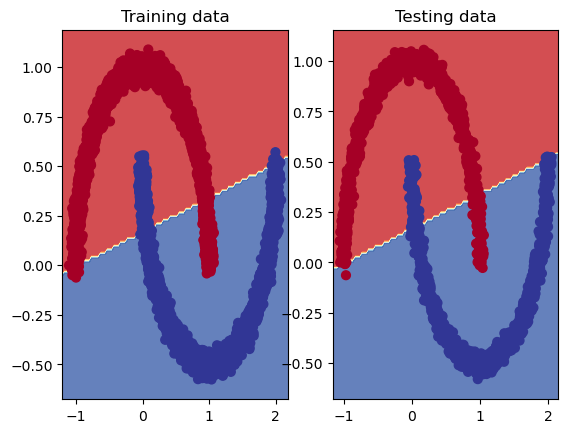

In [29]:
plt.subplot(1, 2, 1)
plt.title("Training data")
plot_decision_boundary(model_6, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Testing data")
plot_decision_boundary(model_6, X_test, y_test)

 1/63 [..............................] - ETA: 0s

63/63 [==============================] - 0s 343us/step


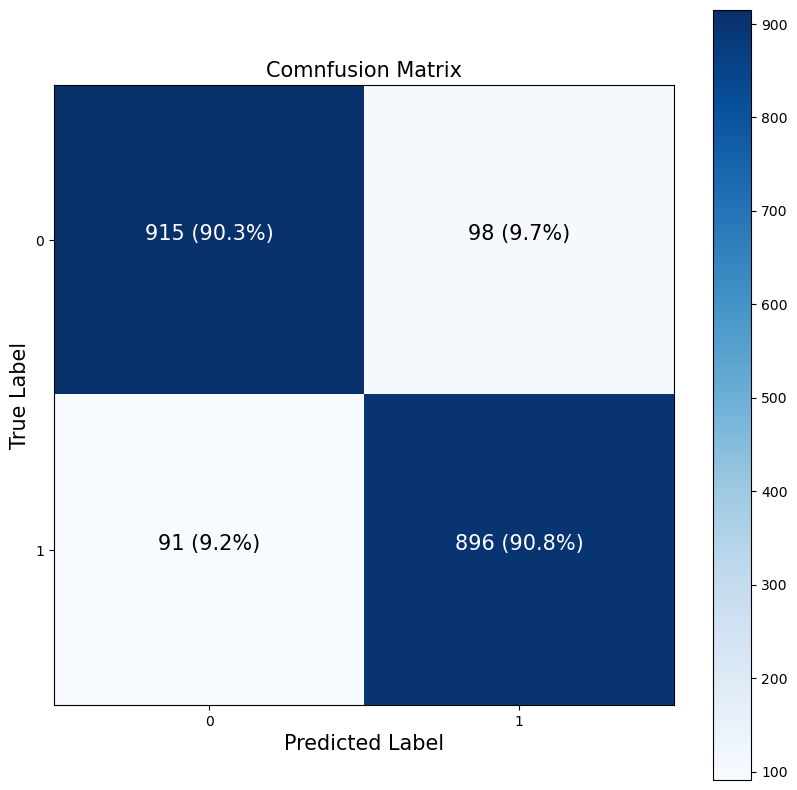

In [30]:
plot_confusion_matrix(y_test, tf.round(model_6.predict(X_test)))

The above learing rate was not at all good enough for faster output. Let's try the other one

In [31]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation= 'tanh'),
    tf.keras.layers.Dense(1, activation= 'sigmoid')
])

model_7.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(learning_rate= 6e-3),
                metrics= ['accuracy'])

history_7 = model_7.fit(X_train, y_train, epochs= 20, validation_data=(X_test, y_test))

Epoch 1/20
250/250 [==============================] - 0s 660us/step - loss: 0.3603 - accuracy: 0.8405 - val_loss: 0.2283 - val_accuracy: 0.9010
Epoch 2/20
250/250 [==============================] - 0s 407us/step - loss: 0.2517 - accuracy: 0.8857 - val_loss: 0.2187 - val_accuracy: 0.9020
Epoch 3/20
250/250 [==============================] - 0s 469us/step - loss: 0.2491 - accuracy: 0.8873 - val_loss: 0.2177 - val_accuracy: 0.8985
Epoch 4/20
250/250 [==============================] - 0s 398us/step - loss: 0.2487 - accuracy: 0.8879 - val_loss: 0.2158 - val_accuracy: 0.9005
Epoch 5/20
250/250 [==============================] - 0s 395us/step - loss: 0.2485 - accuracy: 0.8836 - val_loss: 0.2162 - val_accuracy: 0.9035
Epoch 6/20
250/250 [==============================] - 0s 393us/step - loss: 0.2475 - accuracy: 0.8857 - val_loss: 0.2157 - val_accuracy: 0.9050
Epoch 7/20
250/250 [==============================] - 0s 386us/step - loss: 0.2467 - accuracy: 0.8869 - val_loss: 0.2148 - val_accuracy:

319/319 [==============================] - 0s 239us/step
doing binary classification
319/319 [==============================] - 0s 224us/step
doing binary classification


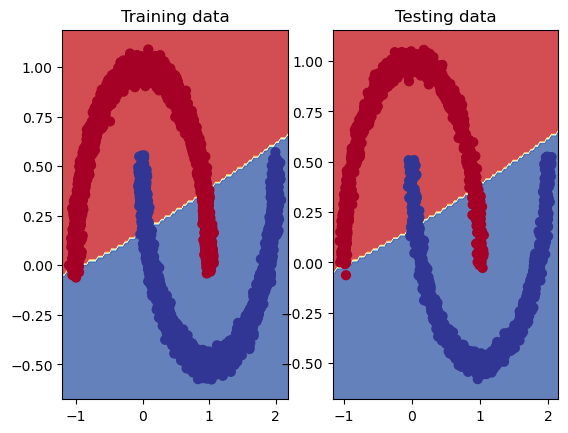

In [32]:
plt.subplot(1, 2, 1)
plt.title("Training data")
plot_decision_boundary(model_7, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Testing data")
plot_decision_boundary(model_7, X_test, y_test)

 1/63 [..............................] - ETA: 0s

63/63 [==============================] - 0s 474us/step


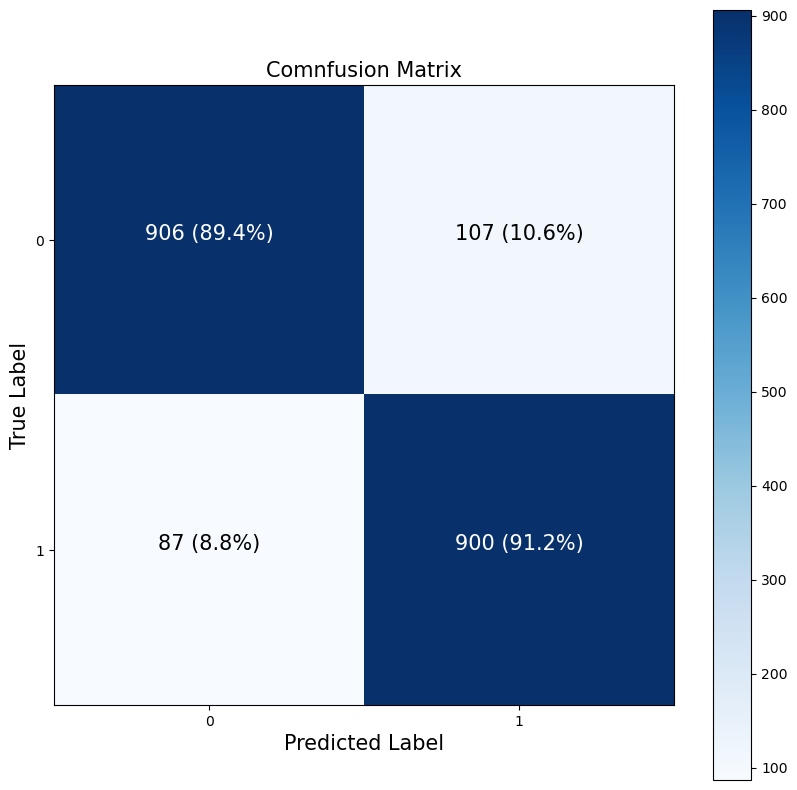

In [33]:
plot_confusion_matrix(y_test, tf.round(model_7.predict(X_test)))

From the above experiments, we can conclude that `model_4` has performed the best

319/319 [==============================] - 0s 236us/step
doing binary classification
319/319 [==============================] - 0s 229us/step
doing binary classification


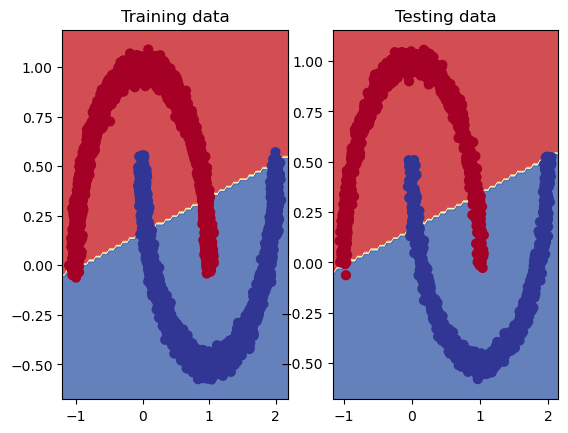

In [34]:
plt.subplot(1, 2, 1)
plt.title("Training data")
plot_decision_boundary(model_4, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Testing data")
plot_decision_boundary(model_4, X_test, y_test)

 1/63 [..............................] - ETA: 0s

63/63 [==============================] - 0s 287us/step


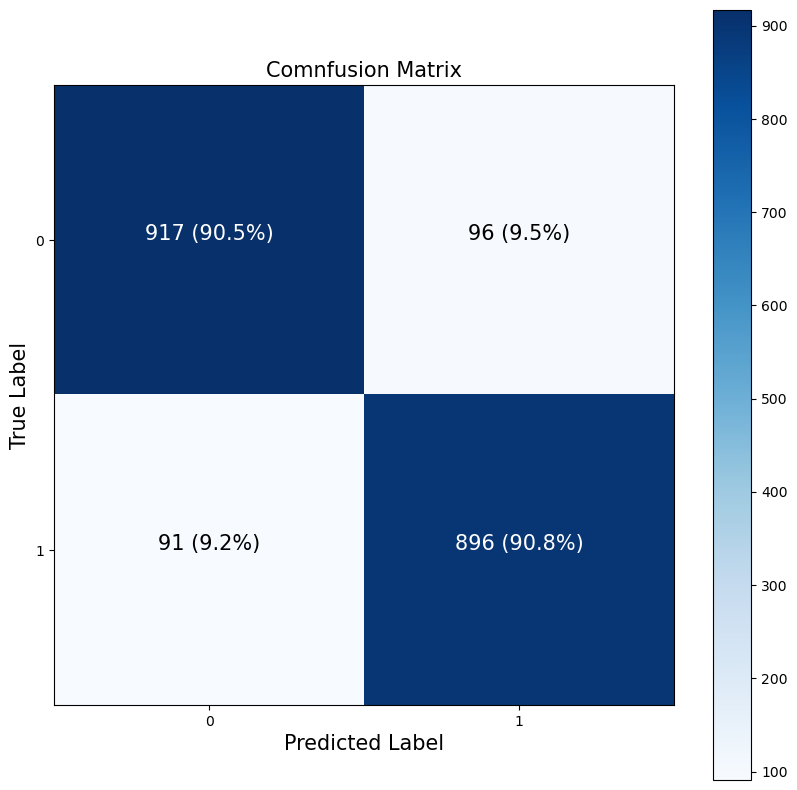

In [35]:
plot_confusion_matrix(y_test, tf.round(model_4.predict(X_test)))

In [36]:
X_test

array([[ 0.8141004 , -0.51346939],
       [ 1.49960073, -0.34049139],
       [-0.9829114 ,  0.24391071],
       ...,
       [ 0.5114129 ,  0.86143247],
       [-0.15628843,  1.00866236],
       [-0.35473776,  0.88803656]])

In [37]:
model_4.evaluate(X_test, y_test)

 1/63 [..............................] - ETA: 1s - loss: 0.2600 - accuracy: 0.9062

63/63 [==============================] - 0s 457us/step - loss: 0.2130 - accuracy: 0.9065


[0.21298307180404663, 0.906499981880188]

# Making a Classification model for Fashion MNISt Dataset

## Loading the data

In [38]:
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [39]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [40]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [41]:
# Plotting random images from the dataset to analyse
def plot_random_images():
    plt.figure(figsize= (10, 7))

    rand_idx = [random.randrange(0, train_data.shape[0]) for _ in range(6)]
    for i in range(6):
        ax = plt.subplot(2, 3, 1 + i)
        plt.imshow(train_data[rand_idx[i]], cmap= plt.cm.binary)
        plt.title(class_names[train_labels[rand_idx[i]]])
        plt.axis(False)
        

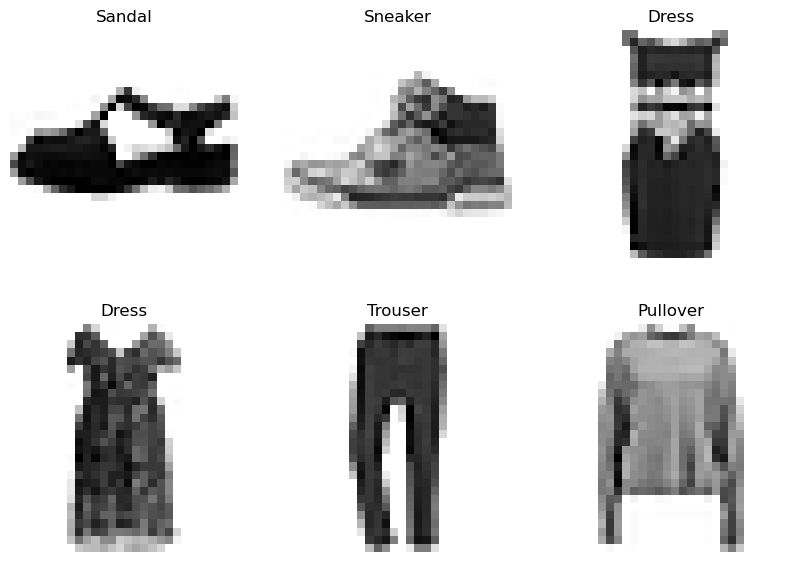

In [42]:
plot_random_images()

In [43]:
## Creating a basic model without any normalisation

tf.random.set_seed(42)

fashion_model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= (28, 28)),
    tf.keras.layers.Dense(len(class_names), activation= 'softmax')
])

fashion_model_1.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                        optimizer= tf.keras.optimizers.Adam(),
                        metrics= ['accuracy'])

fashion_history_1 = fashion_model_1.fit(train_data, train_labels,
                                        epochs= 10,
                                        validation_data= (test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 1s 382us/step - loss: 16.6239 - accuracy: 0.7458 - val_loss: 17.0084 - val_accuracy: 0.7471
Epoch 2/10
1875/1875 [==============================] - 1s 348us/step - loss: 12.4649 - accuracy: 0.7879 - val_loss: 27.0727 - val_accuracy: 0.7093
Epoch 3/10
1875/1875 [==============================] - 1s 391us/step - loss: 11.3000 - accuracy: 0.7985 - val_loss: 9.4007 - val_accuracy: 0.8008
Epoch 4/10
1875/1875 [==============================] - 1s 384us/step - loss: 10.5124 - accuracy: 0.8004 - val_loss: 11.2958 - val_accuracy: 0.8002
Epoch 5/10
1875/1875 [==============================] - 1s 350us/step - loss: 10.4088 - accuracy: 0.8015 - val_loss: 13.1193 - val_accuracy: 0.7572
Epoch 6/10
1875/1875 [==============================] - 1s 345us/step - loss: 10.3185 - accuracy: 0.8038 - val_loss: 12.5801 - val_accuracy: 0.7673
Epoch 7/10
1875/1875 [==============================] - 1s 337us/step - loss: 10.4457 - accuracy: 0.8044 - val_lo

## Visualisation of the model performance

Since this is an image classification model, we have to think of other avalable visualisation and evaluation metrics, such as:
* Confusion Matrix
* Accuracy and Loss Curve
* Learning rate vs Loss

In [44]:
tf.argmax(fashion_model_1.predict(test_data), axis= 1).shape, test_labels.shape

313/313 [==============================] - 0s 254us/step


(TensorShape([10000]), (10000,))

  1/313 [..............................] - ETA: 3s

313/313 [==============================] - 0s 265us/step


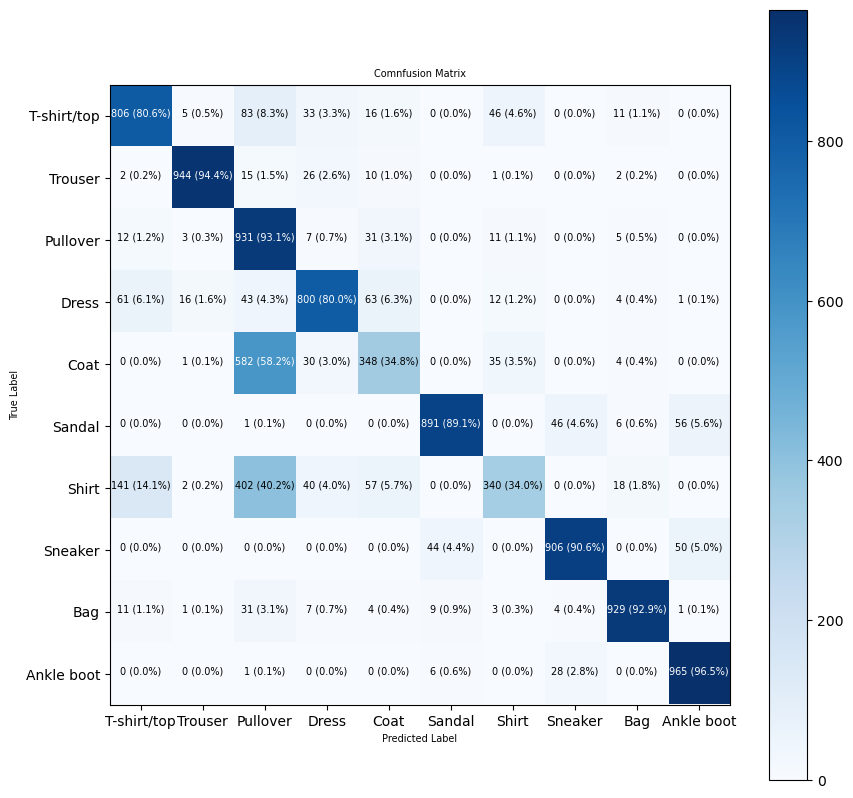

In [45]:
plot_confusion_matrix(y_true= test_labels,
                      y_pred= tf.argmax(fashion_model_1.predict(test_data), axis= 1),
                      classes= class_names,
                      text_size= 7)

Since the Confusion Matrix is very poor we are skipping the other visual aspects and moving on

In [46]:
tf.random.set_seed(42)

fashion_model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= train_data.shape[1: ]),
    tf.keras.layers.Dense(10, activation= 'relu'),
    tf.keras.layers.Dense(len(class_names), activation= 'softmax')
])

fashion_model_2.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                        optimizer= tf.keras.optimizers.Adam(),
                        metrics= ['accuracy'])

fashion_model_2.fit(train_data, train_labels,
                    epochs= 10,
                    validation_data= (test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 1s 442us/step - loss: 2.2494 - accuracy: 0.2191 - val_loss: 1.7952 - val_accuracy: 0.2579
Epoch 2/10
1875/1875 [==============================] - 1s 364us/step - loss: 1.7141 - accuracy: 0.2634 - val_loss: 1.6288 - val_accuracy: 0.3161
Epoch 3/10
1875/1875 [==============================] - 1s 363us/step - loss: 1.4807 - accuracy: 0.4017 - val_loss: 1.3837 - val_accuracy: 0.4344
Epoch 4/10
1875/1875 [==============================] - 1s 360us/step - loss: 1.3514 - accuracy: 0.4337 - val_loss: 1.3586 - val_accuracy: 0.4530
Epoch 5/10
1875/1875 [==============================] - 1s 364us/step - loss: 1.3143 - accuracy: 0.4442 - val_loss: 1.3083 - val_accuracy: 0.4373
Epoch 6/10
1875/1875 [==============================] - 1s 381us/step - loss: 1.2899 - accuracy: 0.4450 - val_loss: 1.3228 - val_accuracy: 0.4447
Epoch 7/10
1875/1875 [==============================] - 1s 391us/step - loss: 1.2713 - accuracy: 0.4529 - val_loss: 1.2796 -

313/313 [==============================] - 0s 269us/step


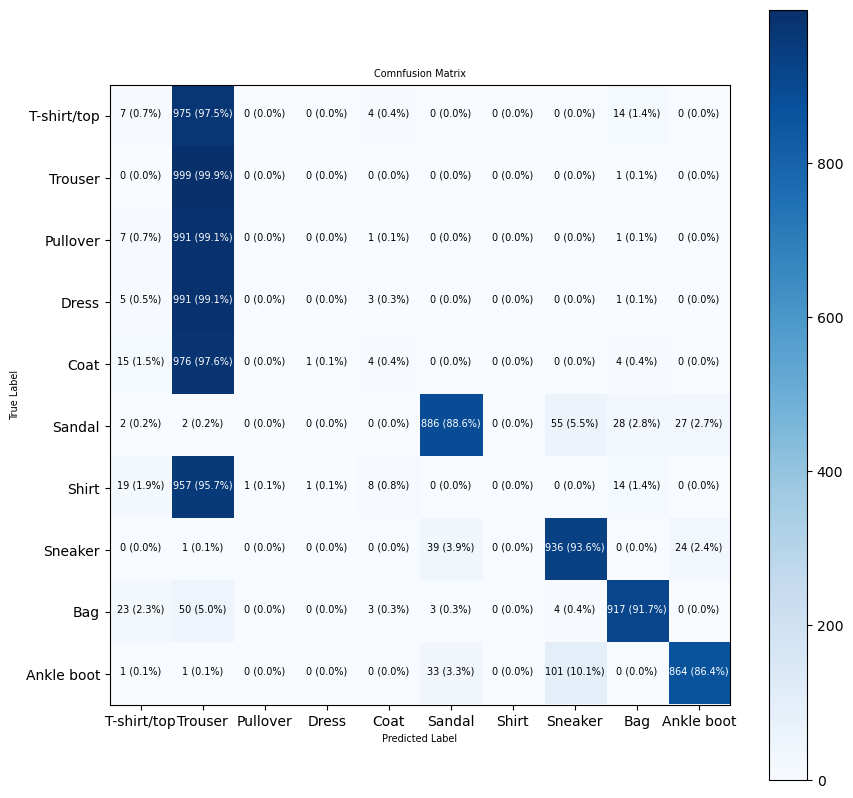

In [47]:
plot_confusion_matrix(y_true= test_labels,
                      y_pred= tf.argmax(fashion_model_2.predict(test_data), axis= 1),
                      classes= class_names,
                      text_size= 7)

In [48]:
tf.random.set_seed(42)

fashion_model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= train_data.shape[1: ]),
    tf.keras.layers.Dense(10, activation= tf.keras.activations.swish),
    tf.keras.layers.Dense(len(class_names), activation= 'softmax')
])

fashion_model_3.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                        optimizer= tf.keras.optimizers.Adam(),
                        metrics= ['accuracy'])

fashion_model_3.fit(train_data, train_labels,
                    epochs= 10,
                    validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 1s 404us/step - loss: 2.3702 - accuracy: 0.1675 - val_loss: 1.9698 - val_accuracy: 0.2298
Epoch 2/10
1875/1875 [==============================] - 1s 393us/step - loss: 1.5302 - accuracy: 0.3861 - val_loss: 1.4797 - val_accuracy: 0.3558
Epoch 3/10
1875/1875 [==============================] - 1s 389us/step - loss: 1.3605 - accuracy: 0.4372 - val_loss: 1.2971 - val_accuracy: 0.4663
Epoch 4/10
1875/1875 [==============================] - 1s 418us/step - loss: 1.2357 - accuracy: 0.4961 - val_loss: 1.1547 - val_accuracy: 0.5882
Epoch 5/10
1875/1875 [==============================] - 1s 369us/step - loss: 1.0861 - accuracy: 0.5618 - val_loss: 0.9998 - val_accuracy: 0.5929
Epoch 6/10
1875/1875 [==============================] - 1s 374us/step - loss: 0.9758 - accuracy: 0.6027 - val_loss: 0.9726 - val_accuracy: 0.6079
Epoch 7/10
1875/1875 [==============================] - 1s 382us/step - loss: 0.9335 - accuracy: 0.6175 - val_loss: 0.9427 -

313/313 [==============================] - 0s 287us/step


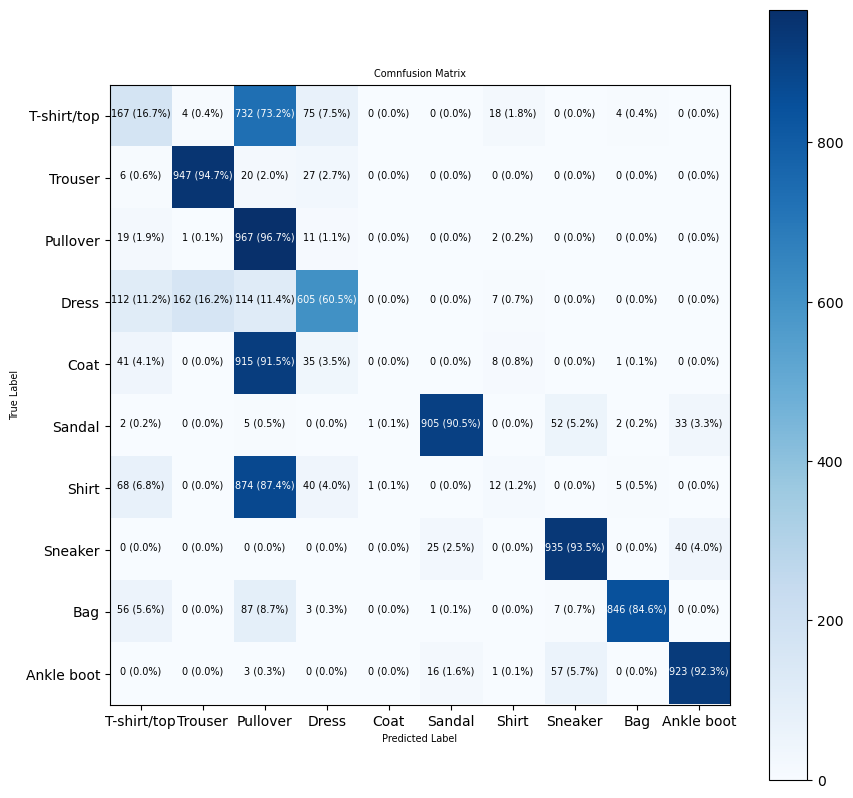

In [49]:
plot_confusion_matrix(y_true= test_labels,
                      y_pred= tf.argmax(fashion_model_3.predict(test_data), axis= 1),
                      classes= class_names,
                      text_size= 7)

In [50]:
tf.random.set_seed(42)

fashion_model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= (28, 28)),
    tf.keras.layers.Dense(len(class_names), activation= 'softmax')
])

fashion_model_4.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                        optimizer= tf.keras.optimizers.Adam(),
                        metrics= ['accuracy'])

fashion_history_4 = fashion_model_4.fit(train_data, train_labels,
                                        epochs= 100,
                                        validation_data= (test_data, test_labels))

Epoch 1/100
1875/1875 [==============================] - 1s 383us/step - loss: 16.3657 - accuracy: 0.7456 - val_loss: 12.8190 - val_accuracy: 0.7787
Epoch 2/100
1875/1875 [==============================] - 1s 358us/step - loss: 12.0507 - accuracy: 0.7891 - val_loss: 18.6625 - val_accuracy: 0.7555
Epoch 3/100
1875/1875 [==============================] - 1s 344us/step - loss: 11.6149 - accuracy: 0.7979 - val_loss: 9.7104 - val_accuracy: 0.8128
Epoch 4/100
1875/1875 [==============================] - 1s 356us/step - loss: 10.7757 - accuracy: 0.8002 - val_loss: 12.0411 - val_accuracy: 0.7999
Epoch 5/100
1875/1875 [==============================] - 1s 342us/step - loss: 10.7538 - accuracy: 0.8018 - val_loss: 11.3359 - val_accuracy: 0.7912
Epoch 6/100
1875/1875 [==============================] - 1s 346us/step - loss: 9.9423 - accuracy: 0.8058 - val_loss: 14.0074 - val_accuracy: 0.7586
Epoch 7/100
1875/1875 [==============================] - 1s 353us/step - loss: 10.3168 - accuracy: 0.8049 - 

  1/313 [..............................] - ETA: 5s

313/313 [==============================] - 0s 260us/step


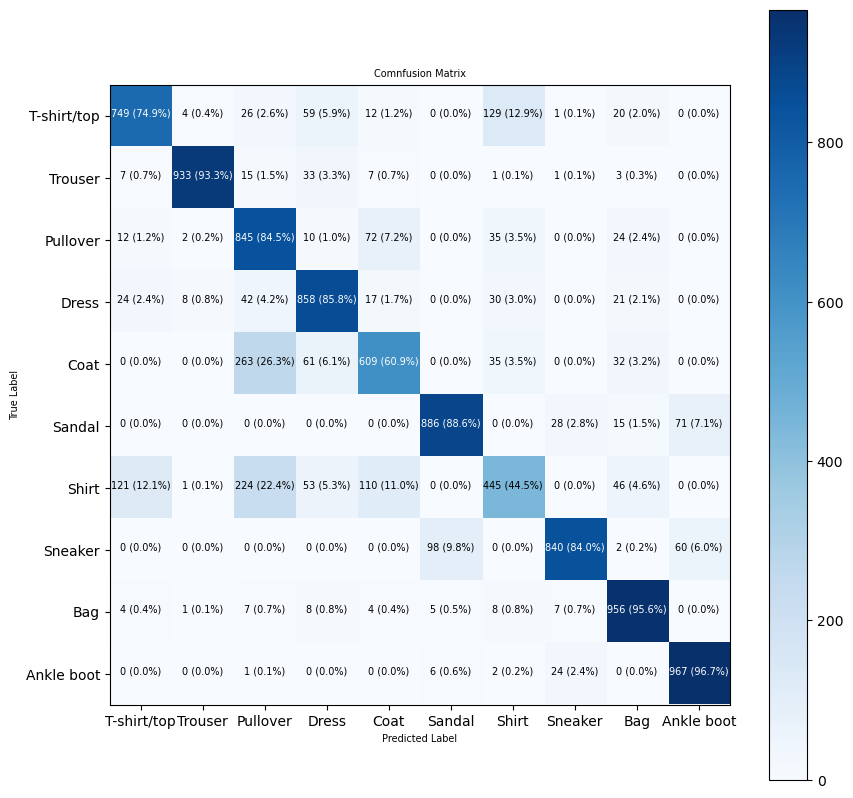

In [51]:
plot_confusion_matrix(y_true= test_labels,
                      y_pred= tf.argmax(fashion_model_4.predict(test_data), axis= 1),
                      classes= class_names,
                      text_size= 7)

In [52]:
fashion_model_4.evaluate(test_data, test_labels)

  1/313 [..............................] - ETA: 4s - loss: 9.0291 - accuracy: 0.8438

313/313 [==============================] - 0s 332us/step - loss: 12.4318 - accuracy: 0.8088


[12.431768417358398, 0.8087999820709229]

In [53]:
tf.random.set_seed(42)

fashion_model_5 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= (28, 28)),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(len(class_names), activation= 'softmax')
])

fashion_model_5.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                        optimizer= tf.keras.optimizers.Adam(),
                        metrics= ['accuracy'])

fashion_history_5 = fashion_model_5.fit(train_data, train_labels,
                                        epochs= 100,
                                        validation_data= (test_data, test_labels))

Epoch 1/100
1875/1875 [==============================] - 1s 381us/step - loss: 7.0571 - accuracy: 0.6828 - val_loss: 1.5772 - val_accuracy: 0.7372
Epoch 2/100
1875/1875 [==============================] - 1s 347us/step - loss: 1.1105 - accuracy: 0.7592 - val_loss: 1.2895 - val_accuracy: 0.7303
Epoch 3/100
1875/1875 [==============================] - 1s 347us/step - loss: 0.7496 - accuracy: 0.7854 - val_loss: 0.7821 - val_accuracy: 0.7702
Epoch 4/100
1875/1875 [==============================] - 1s 356us/step - loss: 0.6881 - accuracy: 0.7983 - val_loss: 0.7399 - val_accuracy: 0.7813
Epoch 5/100
1875/1875 [==============================] - 1s 361us/step - loss: 0.6896 - accuracy: 0.8024 - val_loss: 0.6982 - val_accuracy: 0.8054
Epoch 6/100
1875/1875 [==============================] - 1s 355us/step - loss: 0.6593 - accuracy: 0.8050 - val_loss: 0.7310 - val_accuracy: 0.7751
Epoch 7/100
1875/1875 [==============================] - 1s 350us/step - loss: 0.6473 - accuracy: 0.8067 - val_loss: 0

  1/313 [..............................] - ETA: 6s

313/313 [==============================] - 0s 273us/step


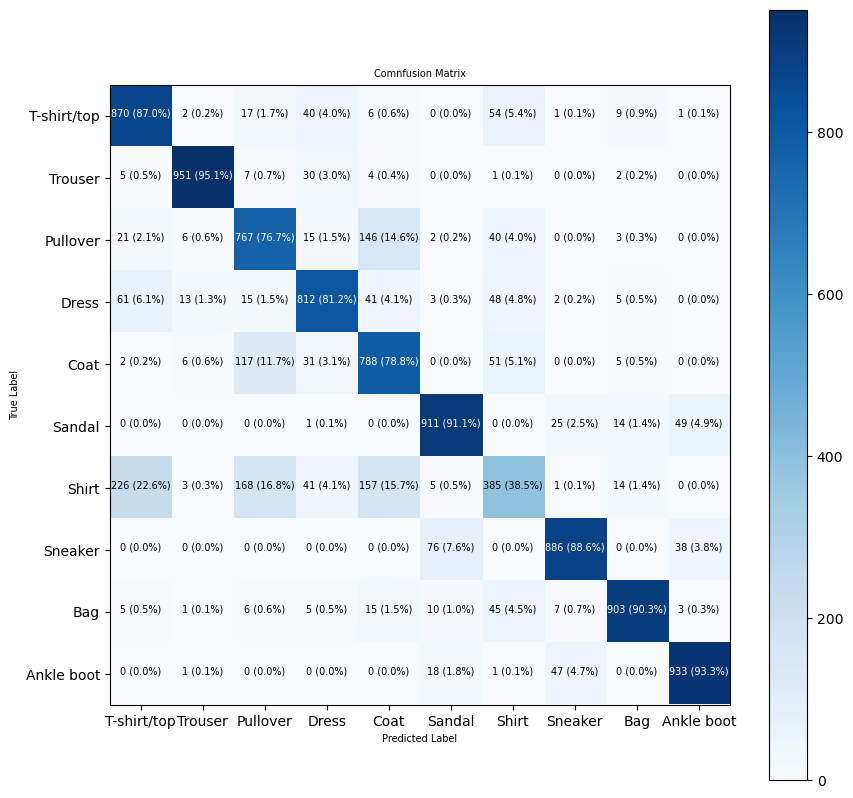

In [54]:
plot_confusion_matrix(y_true= test_labels,
                      y_pred= tf.argmax(fashion_model_5.predict(test_data), axis= 1),
                      classes= class_names,
                      text_size= 7)

In [55]:
tf.random.set_seed(42)

fashion_model_6 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= (28, 28)),
    tf.keras.layers.Dense(5, activation= 'elu'),
    tf.keras.layers.Dense(len(class_names), activation= 'softmax')
])

fashion_model_6.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                        optimizer= tf.keras.optimizers.Adam(),
                        metrics= ['accuracy'])

fashion_history_6 = fashion_model_6.fit(train_data, train_labels,
                                        epochs= 100,
                                        validation_data= (test_data, test_labels))

Epoch 1/100
1875/1875 [==============================] - 1s 417us/step - loss: 2.4784 - accuracy: 0.0988 - val_loss: 2.3028 - val_accuracy: 0.1002
Epoch 2/100
1875/1875 [==============================] - 1s 366us/step - loss: 2.3035 - accuracy: 0.0992 - val_loss: 2.3035 - val_accuracy: 0.1000
Epoch 3/100
1875/1875 [==============================] - 1s 362us/step - loss: 2.3033 - accuracy: 0.0991 - val_loss: 2.3034 - val_accuracy: 0.1000
Epoch 4/100
1875/1875 [==============================] - 1s 364us/step - loss: 2.3034 - accuracy: 0.0998 - val_loss: 2.3033 - val_accuracy: 0.1000
Epoch 5/100
1875/1875 [==============================] - 1s 364us/step - loss: 2.3034 - accuracy: 0.1001 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 6/100
1875/1875 [==============================] - 1s 351us/step - loss: 2.3034 - accuracy: 0.0993 - val_loss: 2.3033 - val_accuracy: 0.1000
Epoch 7/100
1875/1875 [==============================] - 1s 351us/step - loss: 2.3034 - accuracy: 0.0981 - val_loss: 2

## Imporving the model

Ways to improve the model:
* Normalise the test_data
* Add layers
* Change learning rate
* Train more

In [56]:
tf.reduce_max(train_data).numpy()

255

In [57]:
# Normalising the data

train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

In [58]:
tf.random.set_seed(42)

fashion_model_7 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= (28, 28)),
    tf.keras.layers.Dense(5, activation= 'elu'),
    tf.keras.layers.Dense(len(class_names), activation= 'softmax')
])

fashion_model_7.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                        optimizer= tf.keras.optimizers.Adam(),
                        metrics= ['accuracy'])

fashion_history_7 = fashion_model_7.fit(train_data_norm, train_labels,
                                        epochs= 100,
                                        validation_data= (test_data_norm, test_labels))

Epoch 1/100
1875/1875 [==============================] - 1s 397us/step - loss: 0.8243 - accuracy: 0.7168 - val_loss: 0.5815 - val_accuracy: 0.7969
Epoch 2/100
1875/1875 [==============================] - 1s 358us/step - loss: 0.5360 - accuracy: 0.8128 - val_loss: 0.5988 - val_accuracy: 0.7916
Epoch 3/100
1875/1875 [==============================] - 1s 349us/step - loss: 0.5055 - accuracy: 0.8234 - val_loss: 0.5271 - val_accuracy: 0.8131
Epoch 4/100
1875/1875 [==============================] - 1s 353us/step - loss: 0.4889 - accuracy: 0.8278 - val_loss: 0.5178 - val_accuracy: 0.8166
Epoch 5/100
1875/1875 [==============================] - 1s 345us/step - loss: 0.4796 - accuracy: 0.8307 - val_loss: 0.5235 - val_accuracy: 0.8161
Epoch 6/100
1875/1875 [==============================] - 1s 359us/step - loss: 0.4718 - accuracy: 0.8345 - val_loss: 0.5069 - val_accuracy: 0.8192
Epoch 7/100
1875/1875 [==============================] - 1s 371us/step - loss: 0.4661 - accuracy: 0.8363 - val_loss: 0

  1/313 [..............................] - ETA: 6s

313/313 [==============================] - 0s 312us/step


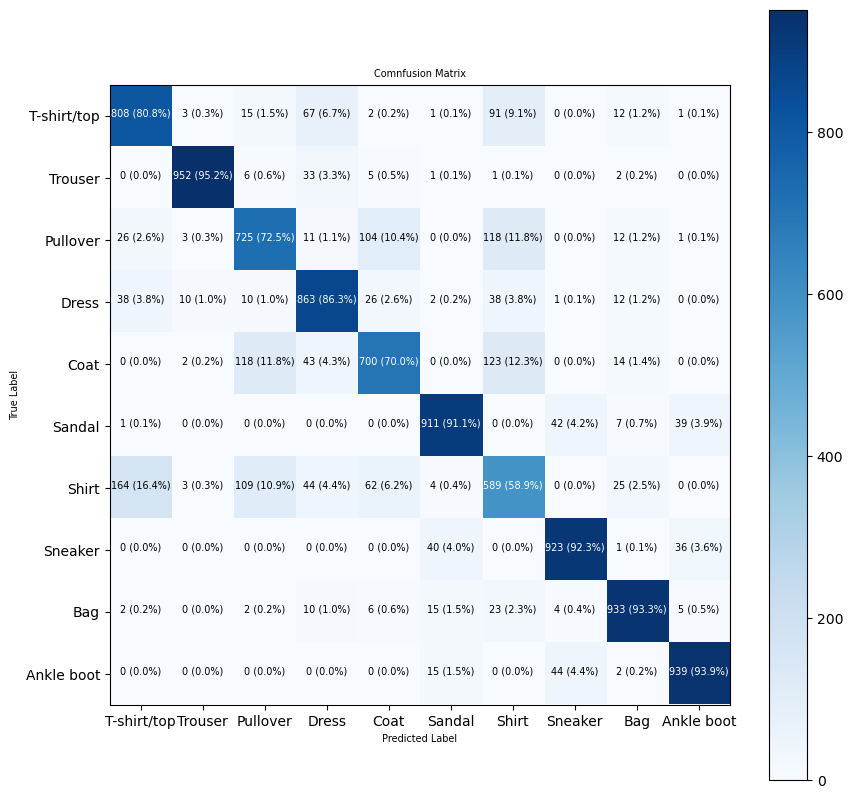

In [59]:
plot_confusion_matrix(y_true= test_labels,
                      y_pred= tf.argmax(fashion_model_7.predict(test_data_norm), axis= 1),
                      classes= class_names,
                      text_size= 7)

The normalised data is working perrfectly with the activation functions let's try some other functions

In [60]:
tf.random.set_seed(42)

fashion_model_8 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= (28, 28)),
    tf.keras.layers.Dense(5, activation= 'relu'),
    tf.keras.layers.Dense(len(class_names), activation= 'softmax')
])

fashion_model_8.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                        optimizer= tf.keras.optimizers.Adam(),
                        metrics= ['accuracy'])

fashion_history_8 = fashion_model_8.fit(train_data_norm, train_labels,
                                        epochs= 10,
                                        validation_data= (test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 1s 390us/step - loss: 1.0346 - accuracy: 0.6227 - val_loss: 0.7624 - val_accuracy: 0.7212
Epoch 2/10
1875/1875 [==============================] - 1s 350us/step - loss: 0.6918 - accuracy: 0.7508 - val_loss: 0.6553 - val_accuracy: 0.7721
Epoch 3/10
1875/1875 [==============================] - 1s 350us/step - loss: 0.5815 - accuracy: 0.7975 - val_loss: 0.5713 - val_accuracy: 0.8013
Epoch 4/10
1875/1875 [==============================] - 1s 360us/step - loss: 0.5206 - accuracy: 0.8180 - val_loss: 0.5378 - val_accuracy: 0.8148
Epoch 5/10
1875/1875 [==============================] - 1s 353us/step - loss: 0.5013 - accuracy: 0.8242 - val_loss: 0.5349 - val_accuracy: 0.8135
Epoch 6/10
1875/1875 [==============================] - 1s 357us/step - loss: 0.4890 - accuracy: 0.8278 - val_loss: 0.5280 - val_accuracy: 0.8163
Epoch 7/10
1875/1875 [==============================] - 1s 356us/step - loss: 0.4814 - accuracy: 0.8314 - val_loss: 0.5218 -

313/313 [==============================] - 0s 269us/step


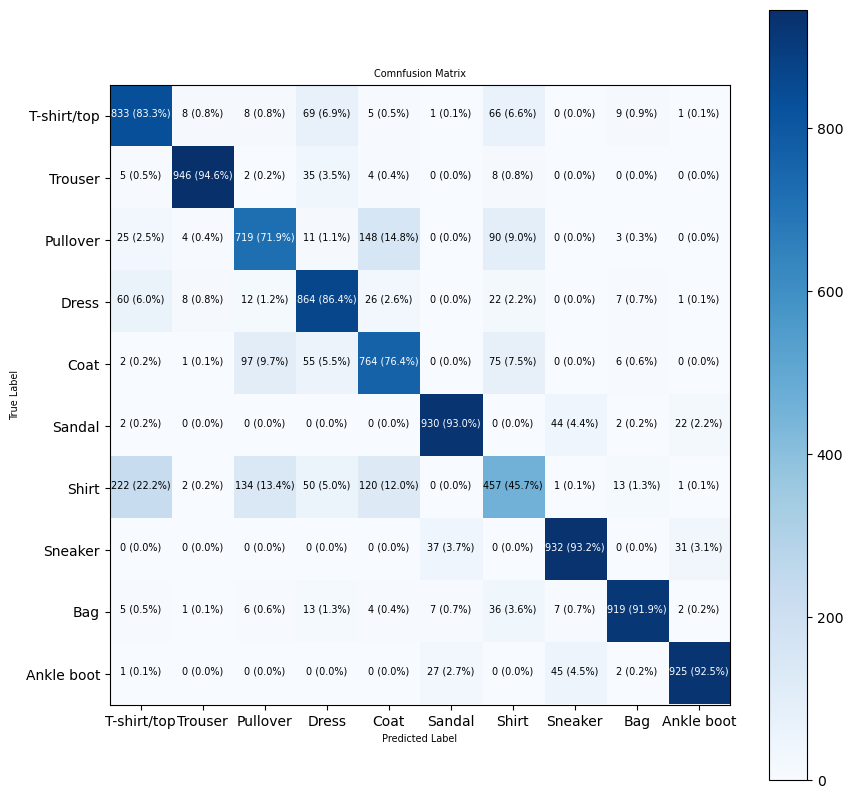

In [61]:
plot_confusion_matrix(y_true= test_labels,
                      y_pred= tf.argmax(fashion_model_8.predict(test_data_norm), axis= 1),
                      classes= class_names,
                      text_size= 7)

In [62]:
fashion_model_8.evaluate(test_data_norm, test_labels), fashion_model_7.evaluate(test_data_norm, test_labels)

  1/313 [..............................] - ETA: 3s - loss: 0.5973 - accuracy: 0.8125

313/313 [==============================] - 0s 319us/step - loss: 0.4878 - accuracy: 0.8343


([0.4942064881324768, 0.8288999795913696],
 [0.48781630396842957, 0.8342999815940857])

In [63]:
tf.random.set_seed(42)

fashion_model_9 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= (28, 28)),
    tf.keras.layers.Dense(10, activation= 'elu'),
    tf.keras.layers.Dense(len(class_names), activation= 'softmax')
])

fashion_model_9.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                        optimizer= tf.keras.optimizers.Adam(),
                        metrics= ['accuracy'])

fashion_history_9 = fashion_model_9.fit(train_data_norm, train_labels,
                                        epochs= 10,
                                        validation_data= (test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 1s 408us/step - loss: 0.6278 - accuracy: 0.7916 - val_loss: 0.5020 - val_accuracy: 0.8265
Epoch 2/10
1875/1875 [==============================] - 1s 354us/step - loss: 0.4547 - accuracy: 0.8429 - val_loss: 0.5415 - val_accuracy: 0.8146
Epoch 3/10
1875/1875 [==============================] - 1s 349us/step - loss: 0.4298 - accuracy: 0.8516 - val_loss: 0.4718 - val_accuracy: 0.8308
Epoch 4/10
1875/1875 [==============================] - 1s 351us/step - loss: 0.4143 - accuracy: 0.8562 - val_loss: 0.4568 - val_accuracy: 0.8383
Epoch 5/10
1875/1875 [==============================] - 1s 357us/step - loss: 0.4062 - accuracy: 0.8591 - val_loss: 0.4648 - val_accuracy: 0.8359
Epoch 6/10
1875/1875 [==============================] - 1s 348us/step - loss: 0.3987 - accuracy: 0.8602 - val_loss: 0.4686 - val_accuracy: 0.8363
Epoch 7/10
1875/1875 [==============================] - 1s 351us/step - loss: 0.3937 - accuracy: 0.8627 - val_loss: 0.4460 -

313/313 [==============================] - 0s 230us/step


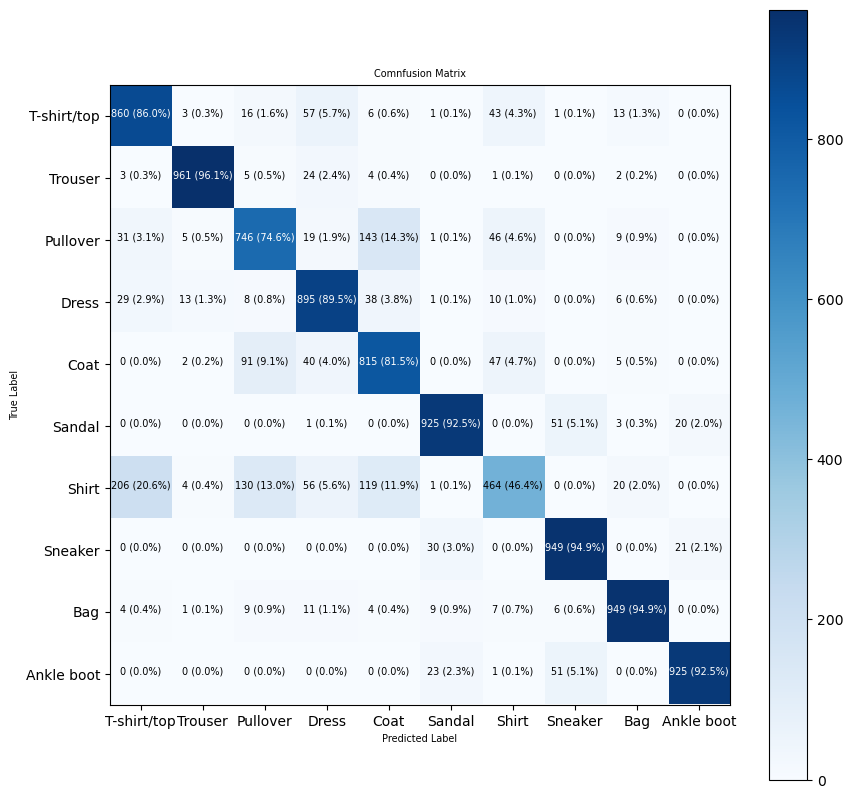

In [64]:
plot_confusion_matrix(y_true= test_labels,
                      y_pred= tf.argmax(fashion_model_9.predict(test_data_norm), axis= 1),
                      classes= class_names,
                      text_size= 7)

In [65]:
fashion_model_9.evaluate(test_data_norm, test_labels)

313/313 [==============================] - 0s 292us/step - loss: 0.4345 - accuracy: 0.8489


[0.43454283475875854, 0.8489000201225281]

In [66]:
tf.random.set_seed(42)

fashion_model_10 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= (28, 28)),
    tf.keras.layers.Dense(10, activation= 'relu'),
    tf.keras.layers.Dense(10, activation= 'elu'),
    tf.keras.layers.Dense(len(class_names), activation= 'softmax')
])

fashion_model_10.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                        optimizer= tf.keras.optimizers.Adam(),
                        metrics= ['accuracy'])

fashion_history_10 = fashion_model_10.fit(train_data_norm, train_labels,
                                        epochs= 10,
                                        validation_data= (test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 1s 415us/step - loss: 0.6492 - accuracy: 0.7817 - val_loss: 0.5082 - val_accuracy: 0.8249
Epoch 2/10
1875/1875 [==============================] - 1s 376us/step - loss: 0.4652 - accuracy: 0.8394 - val_loss: 0.5313 - val_accuracy: 0.8210
Epoch 3/10
1875/1875 [==============================] - 1s 377us/step - loss: 0.4367 - accuracy: 0.8476 - val_loss: 0.4731 - val_accuracy: 0.8306
Epoch 4/10
1875/1875 [==============================] - 1s 380us/step - loss: 0.4174 - accuracy: 0.8558 - val_loss: 0.4480 - val_accuracy: 0.8437
Epoch 5/10
1875/1875 [==============================] - 1s 376us/step - loss: 0.4060 - accuracy: 0.8595 - val_loss: 0.4550 - val_accuracy: 0.8372
Epoch 6/10
1875/1875 [==============================] - 1s 385us/step - loss: 0.3971 - accuracy: 0.8634 - val_loss: 0.4585 - val_accuracy: 0.8344
Epoch 7/10
1875/1875 [==============================] - 1s 378us/step - loss: 0.3902 - accuracy: 0.8644 - val_loss: 0.4558 -

313/313 [==============================] - 0s 226us/step


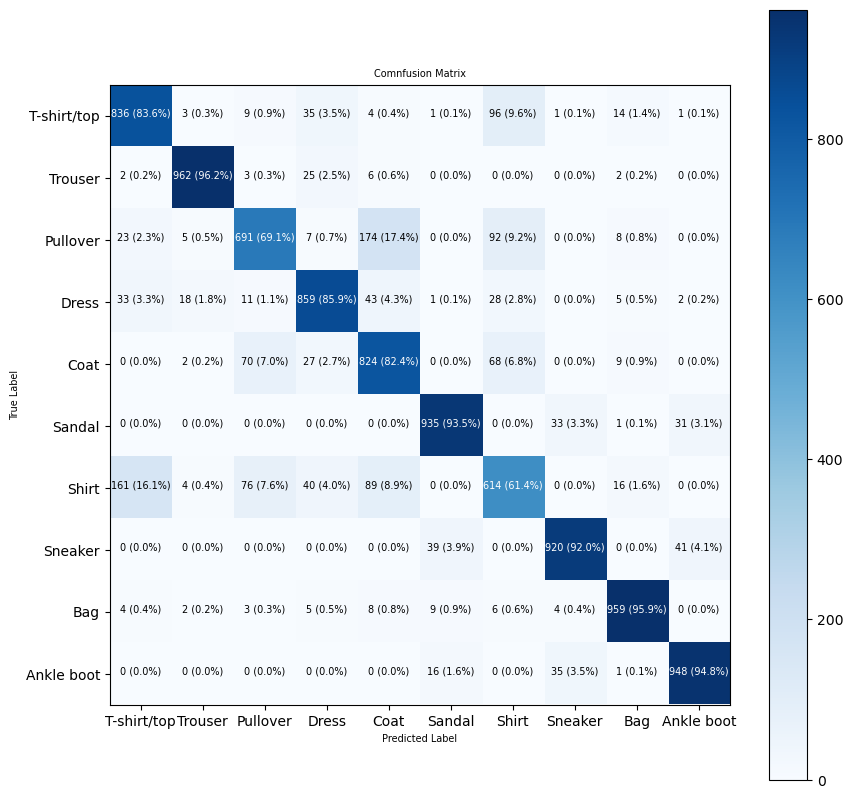

In [67]:
plot_confusion_matrix(y_true= test_labels,
                      y_pred= tf.argmax(fashion_model_10.predict(test_data_norm), axis= 1),
                      classes= class_names,
                      text_size= 7)

In [68]:
tf.random.set_seed(42)

fashion_model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= (28, 28)),
    tf.keras.layers.Dense(10, activation= 'relu'),
    tf.keras.layers.Dense(10, activation= 'tanh'),
    tf.keras.layers.Dense(10, activation= 'elu'),
    tf.keras.layers.Dense(len(class_names), activation= 'softmax')
])

fashion_model_11.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                        optimizer= tf.keras.optimizers.Adam(),
                        metrics= ['accuracy'])

fashion_history_11 = fashion_model_11.fit(train_data_norm, train_labels,
                                        epochs= 10,
                                        validation_data= (test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 1s 445us/step - loss: 0.7253 - accuracy: 0.7521 - val_loss: 0.5327 - val_accuracy: 0.8168
Epoch 2/10
1875/1875 [==============================] - 1s 394us/step - loss: 0.4809 - accuracy: 0.8333 - val_loss: 0.4909 - val_accuracy: 0.8289
Epoch 3/10
1875/1875 [==============================] - 1s 397us/step - loss: 0.4384 - accuracy: 0.8460 - val_loss: 0.4776 - val_accuracy: 0.8325
Epoch 4/10
1875/1875 [==============================] - 1s 394us/step - loss: 0.4137 - accuracy: 0.8537 - val_loss: 0.4652 - val_accuracy: 0.8363
Epoch 5/10
1875/1875 [==============================] - 1s 396us/step - loss: 0.4006 - accuracy: 0.8584 - val_loss: 0.4605 - val_accuracy: 0.8367
Epoch 6/10
1875/1875 [==============================] - 1s 399us/step - loss: 0.3939 - accuracy: 0.8596 - val_loss: 0.4551 - val_accuracy: 0.8364
Epoch 7/10
1875/1875 [==============================] - 1s 404us/step - loss: 0.3841 - accuracy: 0.8635 - val_loss: 0.4686 -

313/313 [==============================] - 0s 234us/step


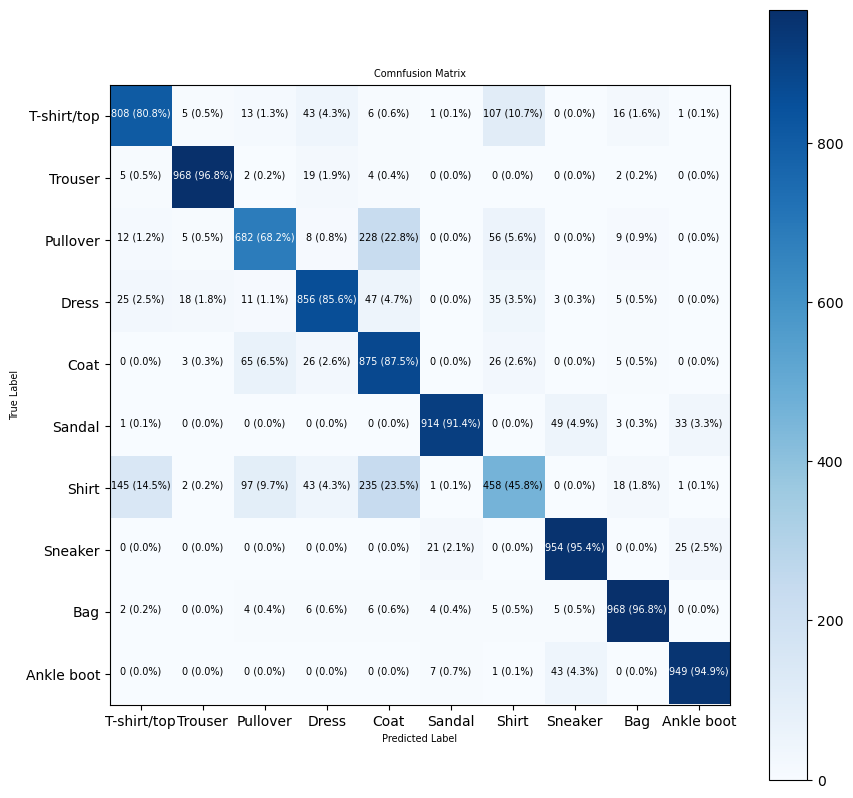

In [69]:
plot_confusion_matrix(y_true= test_labels,
                      y_pred= tf.argmax(fashion_model_11.predict(test_data_norm), axis= 1),
                      classes= class_names,
                      text_size= 7)

In [70]:
tf.random.set_seed(42)

fashion_model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= (28, 28)),
    tf.keras.layers.Dense(10, activation= 'elu'),
    tf.keras.layers.Dense(10, activation= 'tanh'),
    tf.keras.layers.Dense(10, activation= 'elu'),
    tf.keras.layers.Dense(len(class_names), activation= 'softmax')
])

fashion_model_12.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                        optimizer= tf.keras.optimizers.Adam(),
                        metrics= ['accuracy'])

fashion_history_12 = fashion_model_12.fit(train_data_norm, train_labels,
                                        epochs= 10,
                                        validation_data= (test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 1s 448us/step - loss: 0.6813 - accuracy: 0.7745 - val_loss: 0.5142 - val_accuracy: 0.8194
Epoch 2/10
1875/1875 [==============================] - 1s 403us/step - loss: 0.4645 - accuracy: 0.8360 - val_loss: 0.4938 - val_accuracy: 0.8297
Epoch 3/10
1875/1875 [==============================] - 1s 410us/step - loss: 0.4281 - accuracy: 0.8495 - val_loss: 0.4601 - val_accuracy: 0.8351
Epoch 4/10
1875/1875 [==============================] - 1s 405us/step - loss: 0.4048 - accuracy: 0.8568 - val_loss: 0.4333 - val_accuracy: 0.8469
Epoch 5/10
1875/1875 [==============================] - 1s 404us/step - loss: 0.3923 - accuracy: 0.8617 - val_loss: 0.4541 - val_accuracy: 0.8427
Epoch 6/10
1875/1875 [==============================] - 1s 402us/step - loss: 0.3811 - accuracy: 0.8650 - val_loss: 0.4664 - val_accuracy: 0.8307
Epoch 7/10
1875/1875 [==============================] - 1s 408us/step - loss: 0.3747 - accuracy: 0.8663 - val_loss: 0.4355 -

313/313 [==============================] - 0s 249us/step


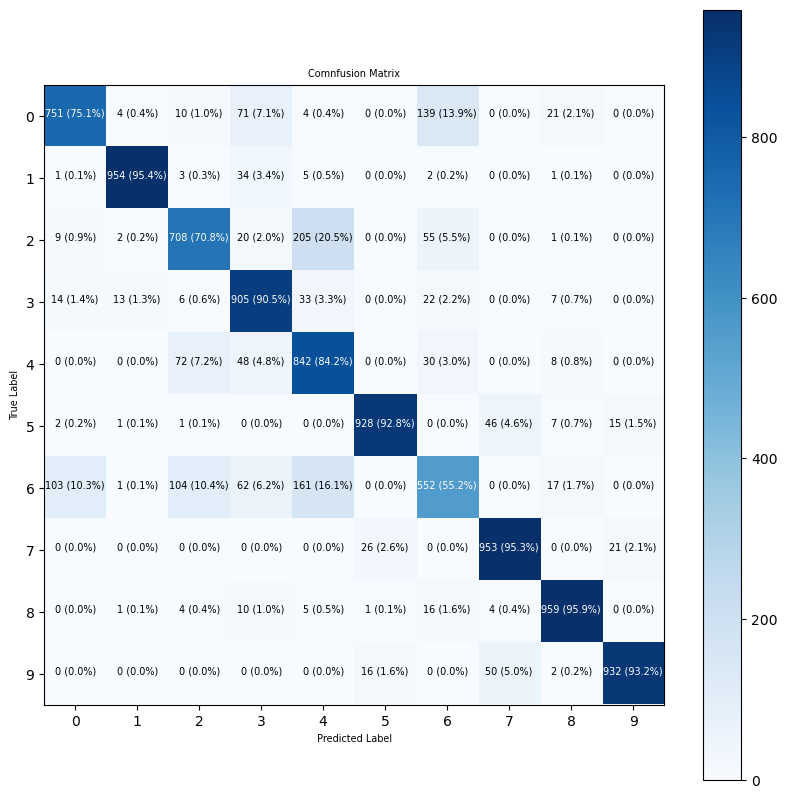

In [71]:
plot_confusion_matrix(y_true= test_labels,
                      y_pred= tf.argmax(fashion_model_12.predict(test_data_norm), axis= 1),
                      text_size= 7)

In [72]:
tf.random.set_seed(42)

fashion_model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= (28, 28)),
    tf.keras.layers.Dense(10, activation= 'elu'),
    tf.keras.layers.Dense(10, activation= 'tanh'),
    tf.keras.layers.Dense(10, activation= 'elu'),
    tf.keras.layers.Dense(10, activation= 'tanh'),
    tf.keras.layers.Dense(len(class_names), activation= 'softmax')
])

fashion_model_13.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                        optimizer= tf.keras.optimizers.Adam(),
                        metrics= ['accuracy'])

fashion_history_13 = fashion_model_13.fit(train_data_norm, train_labels,
                                        epochs= 10,
                                        validation_data= (test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 1s 464us/step - loss: 0.7488 - accuracy: 0.7744 - val_loss: 0.5315 - val_accuracy: 0.8182
Epoch 2/10
1875/1875 [==============================] - 1s 435us/step - loss: 0.4757 - accuracy: 0.8371 - val_loss: 0.5128 - val_accuracy: 0.8201
Epoch 3/10
1875/1875 [==============================] - 1s 421us/step - loss: 0.4357 - accuracy: 0.8481 - val_loss: 0.4742 - val_accuracy: 0.8316
Epoch 4/10
1875/1875 [==============================] - 1s 421us/step - loss: 0.4145 - accuracy: 0.8552 - val_loss: 0.4566 - val_accuracy: 0.8411
Epoch 5/10
1875/1875 [==============================] - 1s 417us/step - loss: 0.4012 - accuracy: 0.8579 - val_loss: 0.4520 - val_accuracy: 0.8435
Epoch 6/10
1875/1875 [==============================] - 1s 419us/step - loss: 0.3885 - accuracy: 0.8627 - val_loss: 0.4690 - val_accuracy: 0.8314
Epoch 7/10
1875/1875 [==============================] - 1s 430us/step - loss: 0.3813 - accuracy: 0.8638 - val_loss: 0.4557 -

313/313 [==============================] - 0s 242us/step


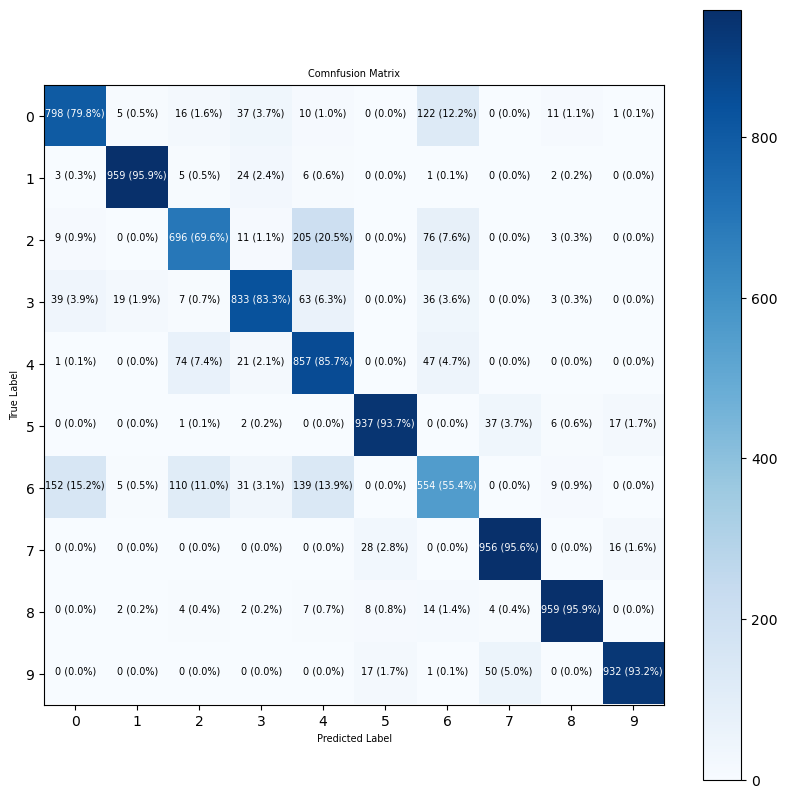

In [73]:
plot_confusion_matrix(test_labels,
                      tf.argmax(fashion_model_13.predict(test_data_norm), axis= 1),
                      text_size= 7)

In [74]:
tf.random.set_seed(42)

fashion_model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= (28, 28)),
    tf.keras.layers.Dense(10, activation= 'elu'),
    tf.keras.layers.Dense(10, activation= 'tanh'),
    tf.keras.layers.Dense(10, activation= 'elu'),
    tf.keras.layers.Dense(10, activation= 'tanh'),
    tf.keras.layers.Dense(len(class_names), activation= 'softmax')
])

fashion_model_14.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                        optimizer= tf.keras.optimizers.Adam(),
                        metrics= ['accuracy'])

fashion_history_14 = fashion_model_14.fit(train_data_norm, train_labels,
                                        epochs= 100,
                                        validation_data= (test_data_norm, test_labels))

Epoch 1/100
1875/1875 [==============================] - 1s 467us/step - loss: 0.7972 - accuracy: 0.7500 - val_loss: 0.5665 - val_accuracy: 0.8144
Epoch 2/100
1875/1875 [==============================] - 1s 421us/step - loss: 0.4881 - accuracy: 0.8377 - val_loss: 0.5219 - val_accuracy: 0.8261
Epoch 3/100
1875/1875 [==============================] - 1s 420us/step - loss: 0.4439 - accuracy: 0.8493 - val_loss: 0.4881 - val_accuracy: 0.8274
Epoch 4/100
1875/1875 [==============================] - 1s 424us/step - loss: 0.4198 - accuracy: 0.8569 - val_loss: 0.4673 - val_accuracy: 0.8362
Epoch 5/100
1875/1875 [==============================] - 1s 421us/step - loss: 0.4049 - accuracy: 0.8607 - val_loss: 0.4850 - val_accuracy: 0.8332
Epoch 6/100
1875/1875 [==============================] - 1s 420us/step - loss: 0.3915 - accuracy: 0.8638 - val_loss: 0.4859 - val_accuracy: 0.8278
Epoch 7/100
1875/1875 [==============================] - 1s 430us/step - loss: 0.3832 - accuracy: 0.8667 - val_loss: 0

  1/313 [..............................] - ETA: 8s

313/313 [==============================] - 0s 295us/step


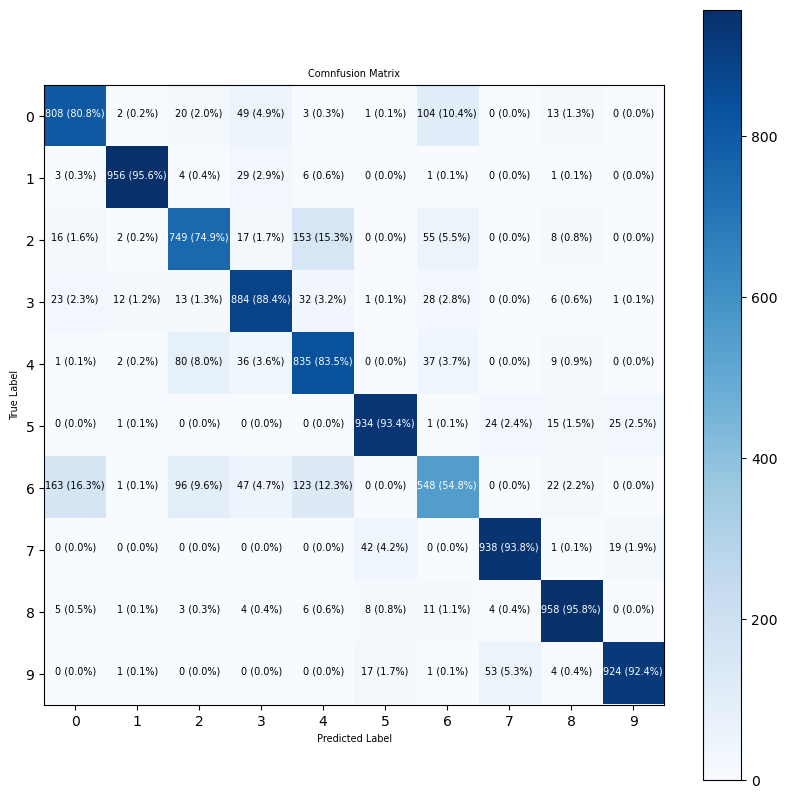

In [75]:
plot_confusion_matrix(test_labels,
                      tf.argmax(fashion_model_14.predict(test_data_norm), axis= 1),
                      text_size= 7)

Let's analyse the learning rate and the loss value and see if there is improvement in the accuracy because of the learning rate

In [76]:
tf.random.set_seed(42)

fashion_model_15 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= (28, 28)),
    tf.keras.layers.Dense(10, activation= 'elu'),
    tf.keras.layers.Dense(10, activation= 'tanh'),
    tf.keras.layers.Dense(10, activation= 'elu'),
    tf.keras.layers.Dense(10, activation= 'tanh'),
    tf.keras.layers.Dense(len(class_names), activation= 'softmax')
])

lr_fashion_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (epoch / 30))

fashion_model_15.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                        optimizer= tf.keras.optimizers.Adam(),
                        metrics= ['accuracy'])

fashion_history_15 = fashion_model_15.fit(train_data_norm, train_labels,
                                        epochs= 100,
                                        validation_data= (test_data_norm, test_labels),
                                        callbacks= [lr_fashion_scheduler])

Epoch 1/100
1875/1875 [==============================] - 1s 464us/step - loss: 1.4924 - accuracy: 0.5988 - val_loss: 1.0840 - val_accuracy: 0.7315 - lr: 1.0000e-04
Epoch 2/100
1875/1875 [==============================] - 1s 418us/step - loss: 0.8914 - accuracy: 0.7629 - val_loss: 0.7740 - val_accuracy: 0.7805 - lr: 1.0798e-04
Epoch 3/100
1875/1875 [==============================] - 1s 425us/step - loss: 0.6889 - accuracy: 0.7986 - val_loss: 0.6531 - val_accuracy: 0.8014 - lr: 1.1659e-04
Epoch 4/100
1875/1875 [==============================] - 1s 421us/step - loss: 0.5942 - accuracy: 0.8184 - val_loss: 0.5852 - val_accuracy: 0.8151 - lr: 1.2589e-04
Epoch 5/100
1875/1875 [==============================] - 1s 422us/step - loss: 0.5371 - accuracy: 0.8293 - val_loss: 0.5447 - val_accuracy: 0.8236 - lr: 1.3594e-04
Epoch 6/100
1875/1875 [==============================] - 1s 419us/step - loss: 0.4988 - accuracy: 0.8384 - val_loss: 0.5243 - val_accuracy: 0.8248 - lr: 1.4678e-04
Epoch 7/100
1875

Text(0.5, 1.0, 'Learning rate vs Loss value')

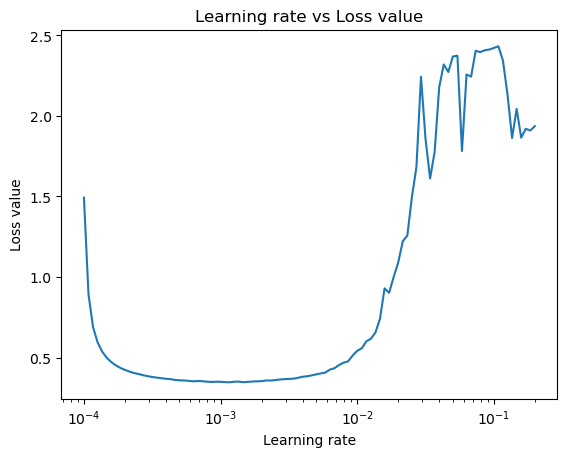

In [77]:
plt.semilogx(fashion_history_15.history['lr'], fashion_history_15.history['loss'])
plt.xlabel("Learning rate")
plt.ylabel("Loss value")
plt.title("Learning rate vs Loss value")

In [78]:
2e-4

0.0002

In [79]:
tf.random.set_seed(42)
learning_rate = 2e-4

fashion_model_16 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= (28, 28)),
    tf.keras.layers.Dense(10, activation= 'elu'),
    tf.keras.layers.Dense(10, activation= 'tanh'),
    tf.keras.layers.Dense(10, activation= 'elu'),
    tf.keras.layers.Dense(10, activation= 'tanh'),
    tf.keras.layers.Dense(len(class_names), activation= 'softmax')
])

fashion_model_16.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                        optimizer= tf.keras.optimizers.Adam(learning_rate= learning_rate),
                        metrics= ['accuracy'])

fashion_history_16 = fashion_model_16.fit(train_data_norm, train_labels,
                                        epochs= 100,
                                        validation_data= (test_data_norm, test_labels),
                                        callbacks= [lr_fashion_scheduler])

Epoch 1/100
1875/1875 [==============================] - 1s 476us/step - loss: 1.6064 - accuracy: 0.5114 - val_loss: 1.2395 - val_accuracy: 0.6509 - lr: 1.0000e-04
Epoch 2/100
1875/1875 [==============================] - 1s 427us/step - loss: 1.0134 - accuracy: 0.7010 - val_loss: 0.8860 - val_accuracy: 0.7258 - lr: 1.0798e-04
Epoch 3/100
1875/1875 [==============================] - 1s 424us/step - loss: 0.7780 - accuracy: 0.7514 - val_loss: 0.7353 - val_accuracy: 0.7607 - lr: 1.1659e-04
Epoch 4/100
1875/1875 [==============================] - 1s 436us/step - loss: 0.6635 - accuracy: 0.7815 - val_loss: 0.6449 - val_accuracy: 0.7825 - lr: 1.2589e-04
Epoch 5/100
1875/1875 [==============================] - 1s 421us/step - loss: 0.5856 - accuracy: 0.8073 - val_loss: 0.5860 - val_accuracy: 0.8065 - lr: 1.3594e-04
Epoch 6/100
1875/1875 [==============================] - 1s 423us/step - loss: 0.5336 - accuracy: 0.8237 - val_loss: 0.5582 - val_accuracy: 0.8143 - lr: 1.4678e-04
Epoch 7/100
1875

In [80]:
tf.random.set_seed(42)
learning_rate = 2e-4

fashion_model_17 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= (28, 28)),
    tf.keras.layers.Dense(10, activation= 'elu'),
    # tf.keras.layers.Dense(10, activation= 'tanh'),
    tf.keras.layers.Dense(10, activation= 'elu'),
    tf.keras.layers.Dense(10, activation= 'tanh'),
    tf.keras.layers.Dense(len(class_names), activation= 'softmax')
])

fashion_model_17.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                        optimizer= tf.keras.optimizers.Adam(learning_rate= learning_rate),
                        metrics= ['accuracy'])

fashion_history_17 = fashion_model_17.fit(train_data_norm, train_labels,
                                        epochs= 20,
                                        validation_data= (test_data_norm, test_labels),
                                        callbacks= [lr_fashion_scheduler])

Epoch 1/20
1875/1875 [==============================] - 1s 444us/step - loss: 1.4553 - accuracy: 0.5757 - val_loss: 1.0998 - val_accuracy: 0.6972 - lr: 1.0000e-04
Epoch 2/20
1875/1875 [==============================] - 1s 402us/step - loss: 0.9265 - accuracy: 0.7443 - val_loss: 0.8287 - val_accuracy: 0.7670 - lr: 1.0798e-04
Epoch 3/20
1875/1875 [==============================] - 1s 409us/step - loss: 0.7314 - accuracy: 0.7913 - val_loss: 0.6924 - val_accuracy: 0.7969 - lr: 1.1659e-04
Epoch 4/20
1875/1875 [==============================] - 1s 403us/step - loss: 0.6275 - accuracy: 0.8121 - val_loss: 0.6166 - val_accuracy: 0.8095 - lr: 1.2589e-04
Epoch 5/20
1875/1875 [==============================] - 1s 402us/step - loss: 0.5654 - accuracy: 0.8231 - val_loss: 0.5709 - val_accuracy: 0.8163 - lr: 1.3594e-04
Epoch 6/20
1875/1875 [==============================] - 1s 400us/step - loss: 0.5251 - accuracy: 0.8298 - val_loss: 0.5445 - val_accuracy: 0.8228 - lr: 1.4678e-04
Epoch 7/20
1875/1875 [

313/313 [==============================] - 0s 230us/step


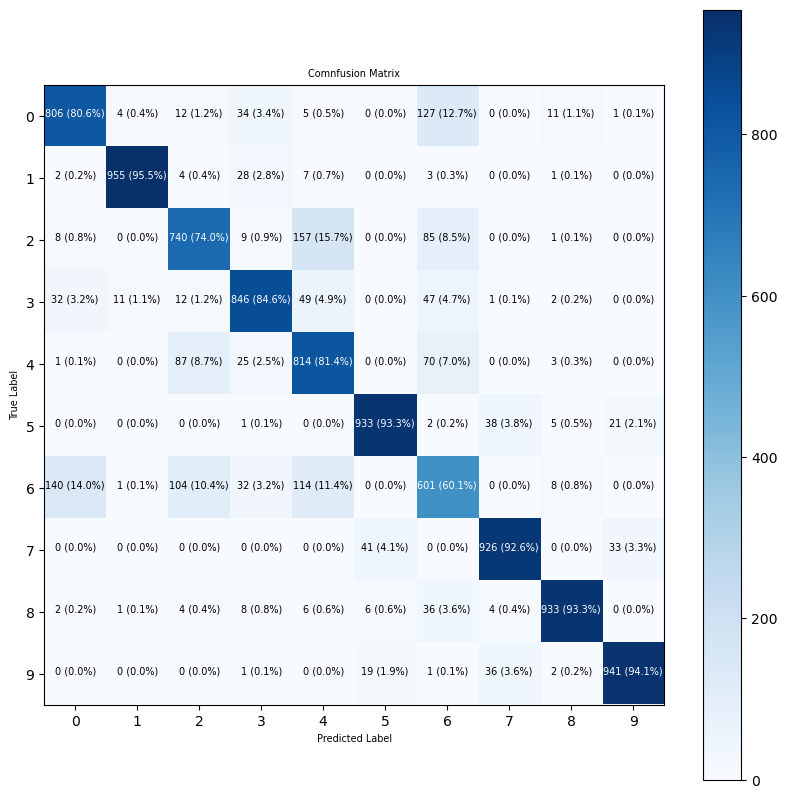

In [81]:
plot_confusion_matrix(test_labels,
                      tf.argmax(fashion_model_17.predict(test_data_norm), axis= 1),
                      text_size= 7)

In [82]:
tf.random.set_seed(42)
learning_rate = 2e-4

fashion_model_18 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= (28, 28)),
    tf.keras.layers.Dense(10, activation= 'elu'),
    tf.keras.layers.Dense(50, activation= 'elu'),
    tf.keras.layers.Dense(100, activation= 'exponential'),
    tf.keras.layers.Dense(100, activation= 'tanh'),
    tf.keras.layers.Dense(50, activation= 'tanh'),
    tf.keras.layers.Dense(len(class_names), activation= 'softmax')
])

fashion_model_18.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                        optimizer= tf.keras.optimizers.Adam(learning_rate= learning_rate),
                        metrics= ['accuracy'])

fashion_history_18 = fashion_model_18.fit(train_data_norm, train_labels,
                                        epochs= 20,
                                        validation_data= (test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 1s 600us/step - loss: 0.6858 - accuracy: 0.7573 - val_loss: 0.5251 - val_accuracy: 0.8107
Epoch 2/20
1875/1875 [==============================] - 1s 555us/step - loss: 0.4618 - accuracy: 0.8342 - val_loss: 0.4806 - val_accuracy: 0.8276
Epoch 3/20
1875/1875 [==============================] - 1s 558us/step - loss: 0.4243 - accuracy: 0.8467 - val_loss: 0.4496 - val_accuracy: 0.8370
Epoch 4/20
1875/1875 [==============================] - 1s 565us/step - loss: 0.4022 - accuracy: 0.8557 - val_loss: 0.4417 - val_accuracy: 0.8388
Epoch 5/20
1875/1875 [==============================] - 1s 557us/step - loss: 0.3861 - accuracy: 0.8603 - val_loss: 0.4277 - val_accuracy: 0.8465
Epoch 6/20
1875/1875 [==============================] - 1s 557us/step - loss: 0.3737 - accuracy: 0.8647 - val_loss: 0.4260 - val_accuracy: 0.8436
Epoch 7/20
1875/1875 [==============================] - 1s 569us/step - loss: 0.3612 - accuracy: 0.8677 - val_loss: 0.4125 -

313/313 [==============================] - 0s 282us/step


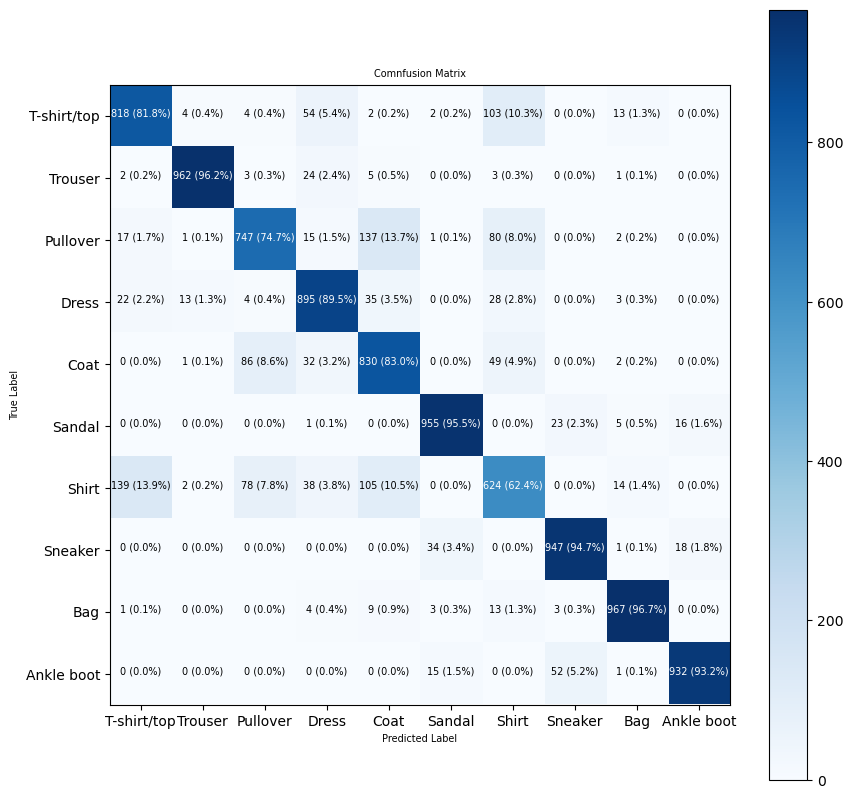

In [83]:
plot_confusion_matrix(test_labels,
                      tf.argmax(fashion_model_18.predict(test_data_norm), axis= 1),
                      text_size= 7,
                      classes= class_names)

In [84]:
tf.random.set_seed(42)
learning_rate = 2e-4

fashion_model_19 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= (28, 28)),
    tf.keras.layers.Dense(10, activation= 'elu'),
    tf.keras.layers.Dense(50, activation= 'elu'),
    tf.keras.layers.Dense(100, activation= 'exponential'),
    tf.keras.layers.Dense(100, activation= 'tanh'),
    tf.keras.layers.Dense(50, activation= 'tanh'),
    tf.keras.layers.Dense(5, activation= 'relu'),
    tf.keras.layers.Dense(len(class_names), activation= 'softmax')
])

fashion_model_19.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                        optimizer= tf.keras.optimizers.Adam(learning_rate= learning_rate),
                        metrics= ['accuracy'])

fashion_history_19 = fashion_model_19.fit(train_data_norm, train_labels,
                                        epochs= 20,
                                        validation_data= (test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 1s 612us/step - loss: 1.1675 - accuracy: 0.5821 - val_loss: 0.6968 - val_accuracy: 0.7484
Epoch 2/20
1875/1875 [==============================] - 1s 567us/step - loss: 0.6037 - accuracy: 0.7878 - val_loss: 0.5753 - val_accuracy: 0.7917
Epoch 3/20
1875/1875 [==============================] - 1s 575us/step - loss: 0.5197 - accuracy: 0.8173 - val_loss: 0.5246 - val_accuracy: 0.8193
Epoch 4/20
1875/1875 [==============================] - 1s 573us/step - loss: 0.4750 - accuracy: 0.8366 - val_loss: 0.4887 - val_accuracy: 0.8332
Epoch 5/20
1875/1875 [==============================] - 1s 581us/step - loss: 0.4503 - accuracy: 0.8447 - val_loss: 0.4807 - val_accuracy: 0.8354
Epoch 6/20
1875/1875 [==============================] - 1s 579us/step - loss: 0.4307 - accuracy: 0.8521 - val_loss: 0.4648 - val_accuracy: 0.8438
Epoch 7/20
1875/1875 [==============================] - 1s 573us/step - loss: 0.4168 - accuracy: 0.8551 - val_loss: 0.4604 -

313/313 [==============================] - 0s 280us/step


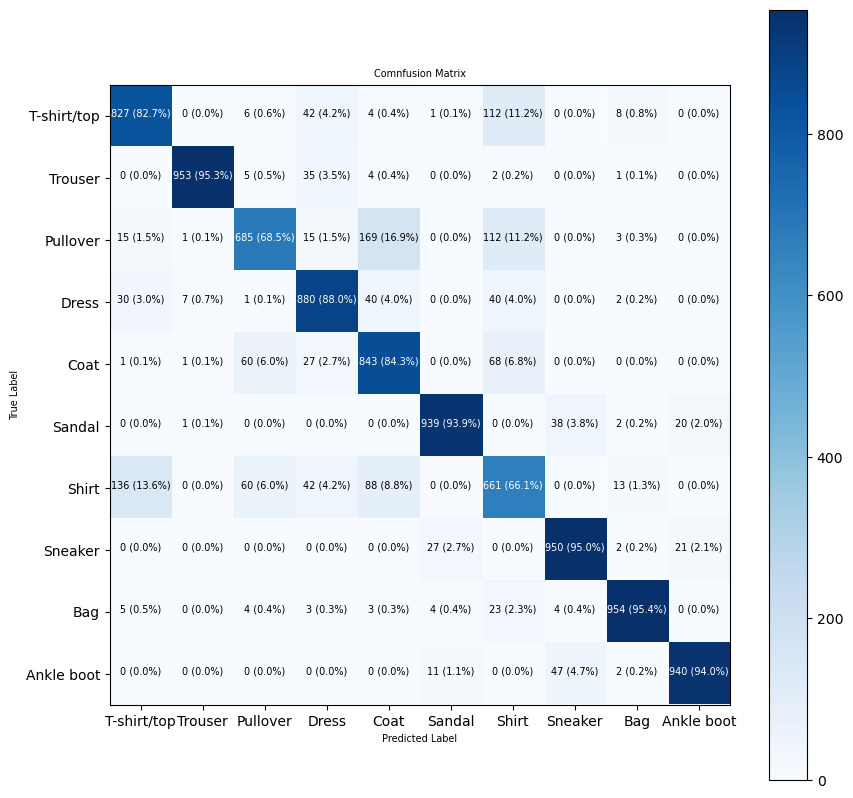

In [85]:
plot_confusion_matrix(test_labels,
                      tf.argmax(fashion_model_19.predict(test_data_norm), axis= 1),
                      classes= class_names,
                      text_size= 7)

Since the model is not improving and the main culprit is prediction of Shirt, Pullover and T-short/Top, we have to look into other aspect of improving the model.

Let's first visualise the above poorly predicted images and see what can be done

In [86]:
#indexes where the above mentioned labels are
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [87]:
def plot_normalised_orginal_data(original_data, normalised_data):
    plt.figure(figsize= (10, 10))
    rand_prob = [random.randint(0, original_data.shape[0]) for _ in range(3)]
    j = 1
    for i in range(3):
        ax = plt.subplot(3, 2, j)
        plt.imshow(original_data[rand_prob[i]])
        plt.title(f"Original {class_names[train_labels[rand_prob[i]]]}")
        plt.axis(False)
        j += 1
        ax = plt.subplot(3, 2, j)
        plt.imshow(normalised_data[rand_prob[i]])
        plt.title(f"Normalised {class_names[train_labels[rand_prob[i]]]}")
        j += 1
        plt.tight_layout()
        plt.axis(False)

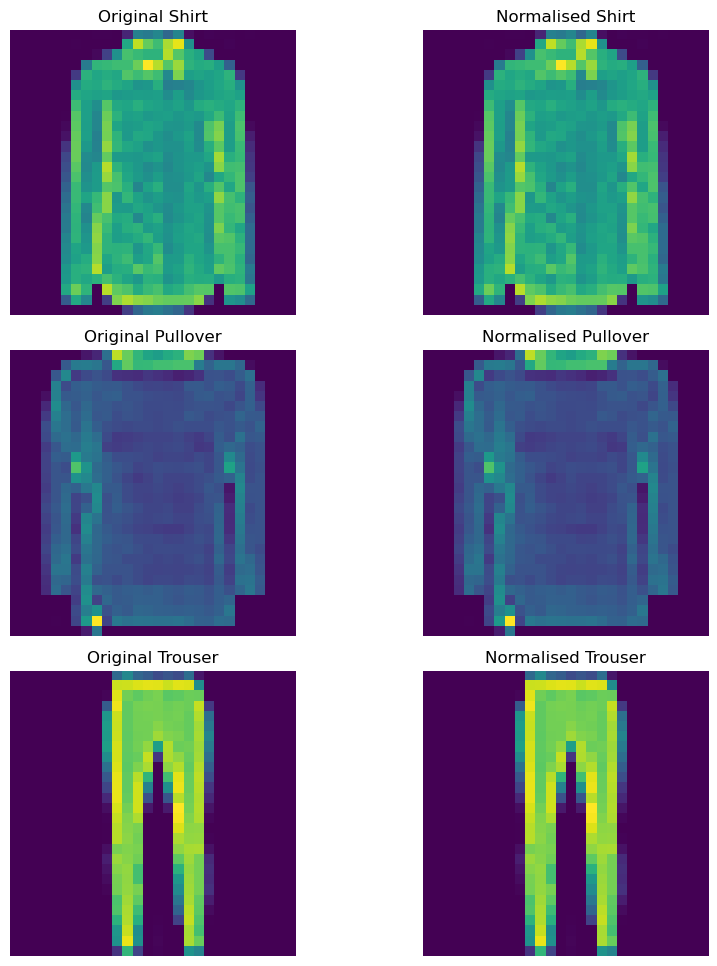

In [88]:
plot_normalised_orginal_data(train_data, train_data_norm)

## Normalising the data using different approaches

Normalising the data with different scalers available and plotting the images so that if the difference between each image is evident then it would be easy for the model to classify

In [89]:
tf.reduce_max(train_data_norm)

<tf.Tensor: shape=(), dtype=float64, numpy=1.0>

In [90]:
tf.reshape(train_data, (train_data.shape[0], 28 * 28))

<tf.Tensor: shape=(60000, 784), dtype=uint8, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)>

In [91]:
minmax_scaler = MinMaxScaler()

minmax_scaler.fit(tf.reshape(train_data, (train_data.shape[0], 28 * 28)))

train_data_minmax = minmax_scaler.transform(tf.reshape(train_data, (train_data.shape[0], 28 * 28)))
test_data_minmax = minmax_scaler.transform(tf.reshape(test_data, (test_data.shape[0], 28 * 28)))

train_data_minmax.shape, test_data_minmax.shape

((60000, 784), (10000, 784))

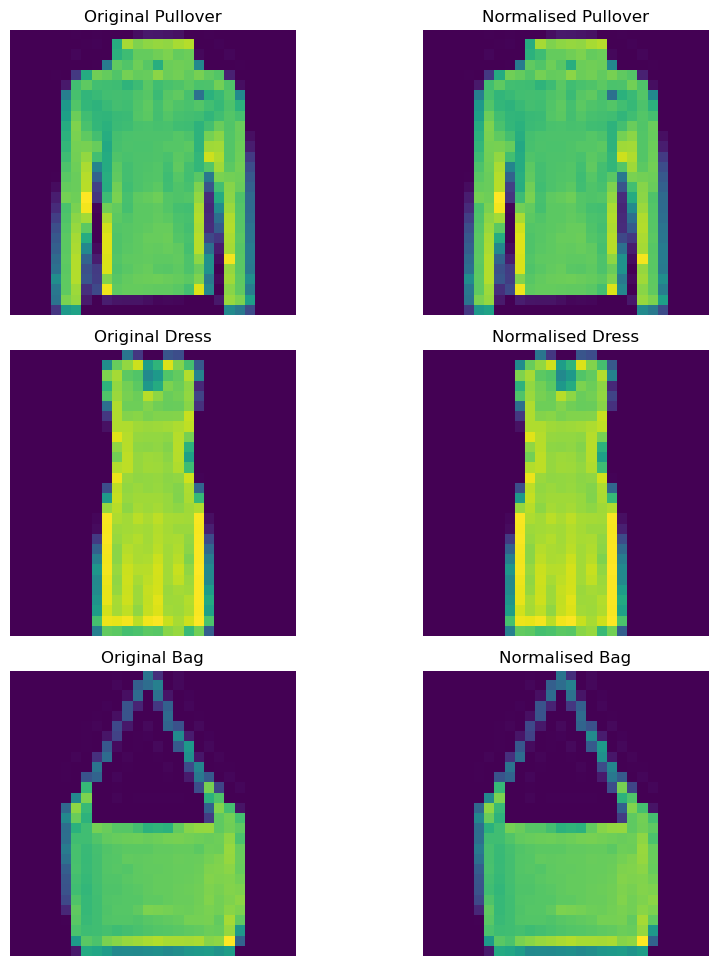

In [92]:
plot_normalised_orginal_data(train_data, tf.reshape(train_data_minmax, shape= (train_data.shape)))

In [93]:
std_scaler = StandardScaler()

std_scaler.fit(tf.reshape(train_data, (train_data.shape[0], 28 * 28)))

train_data_std = std_scaler.transform(tf.reshape(train_data, (train_data.shape[0], 28 * 28)))
test_data_std = std_scaler.transform(tf.reshape(test_data, (test_data.shape[0], 28 * 28)))

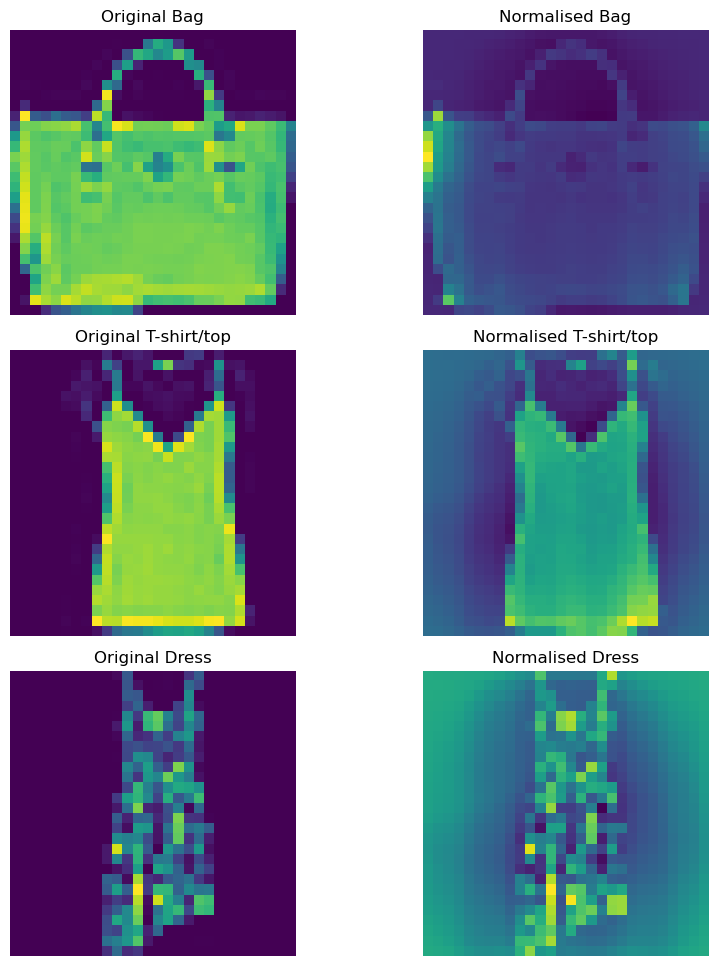

In [94]:
plot_normalised_orginal_data(train_data, tf.reshape(train_data_std, shape= (train_data.shape)))

Number of components: 16
Number of components: 64
Number of components: 144
Number of components: 256
Number of components: 400
Number of components: 576
Number of components: 784
7


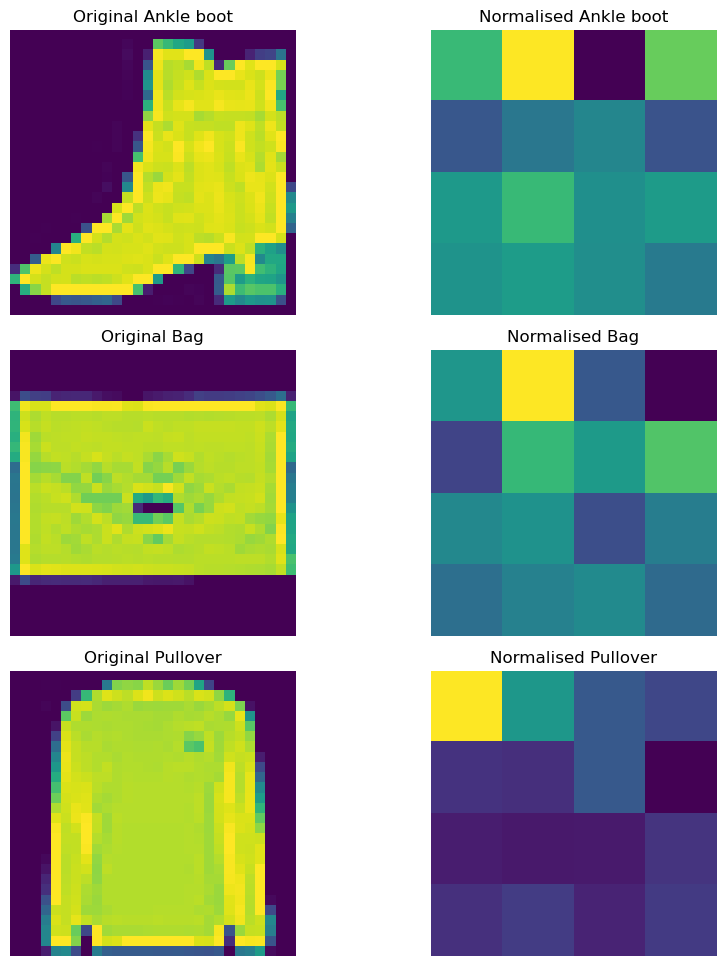

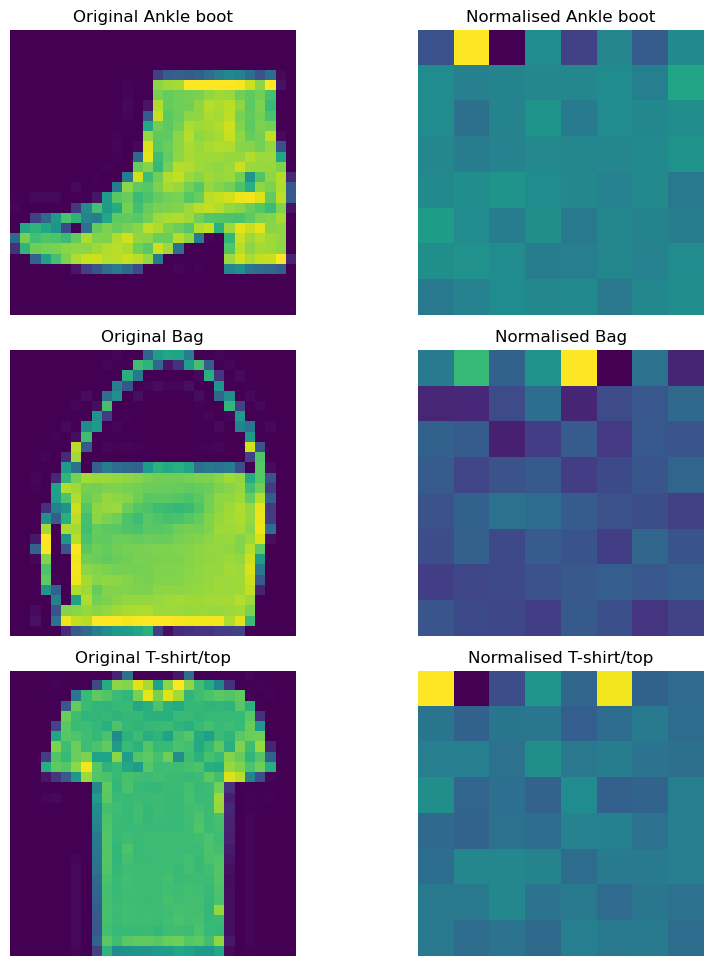

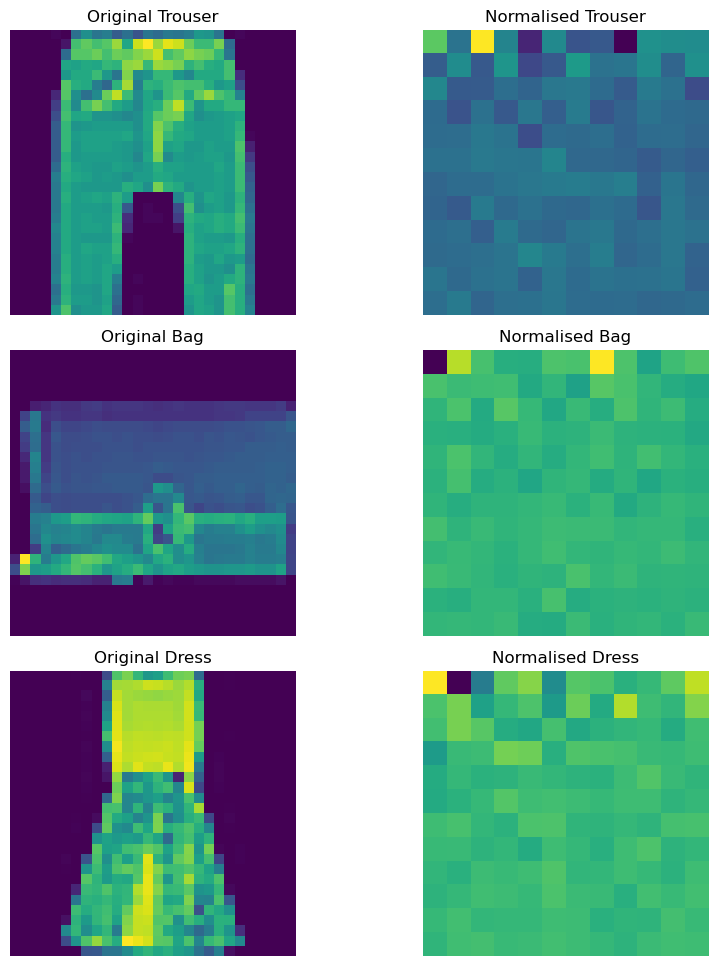

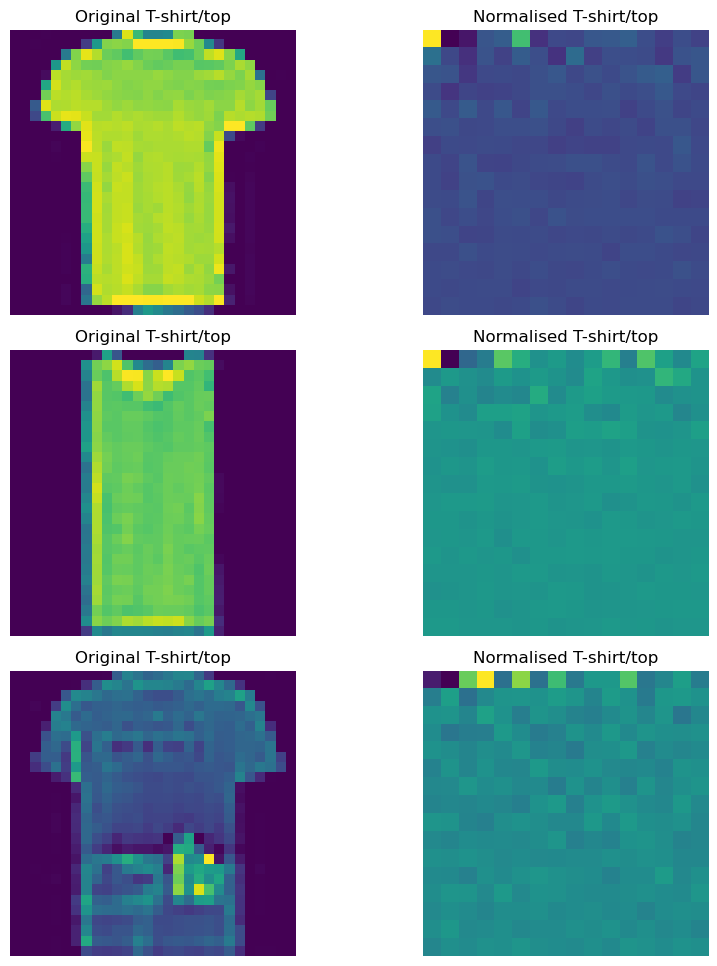

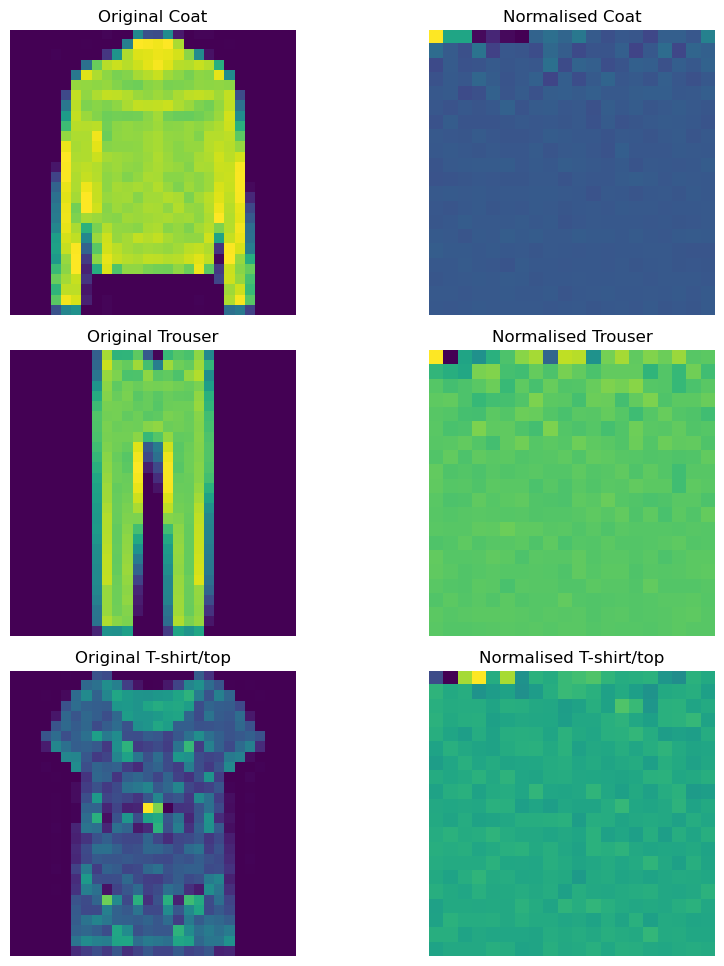

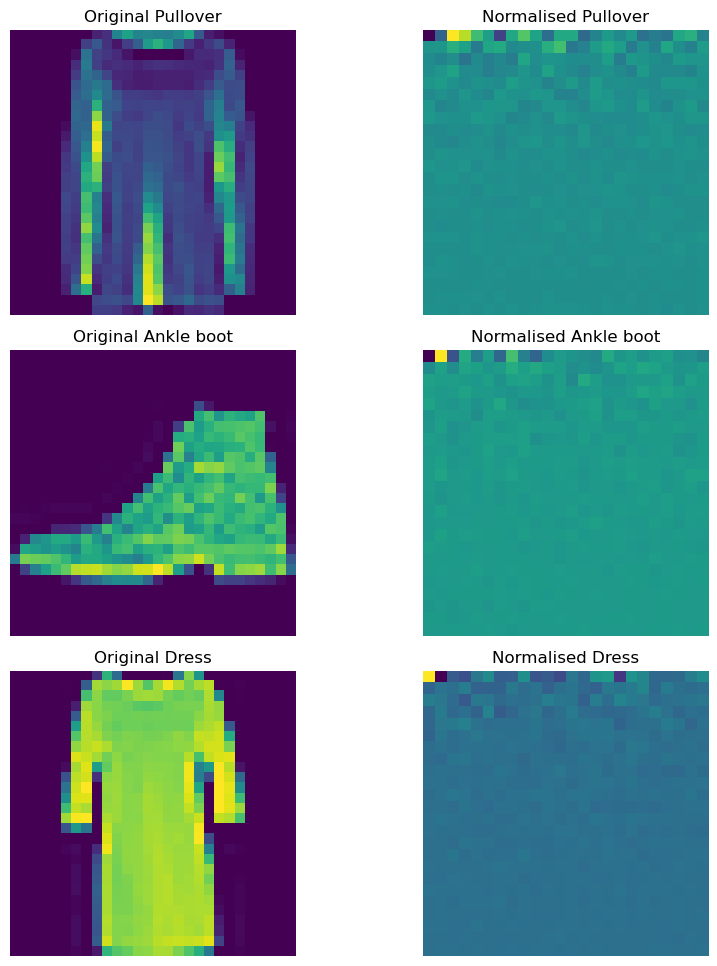

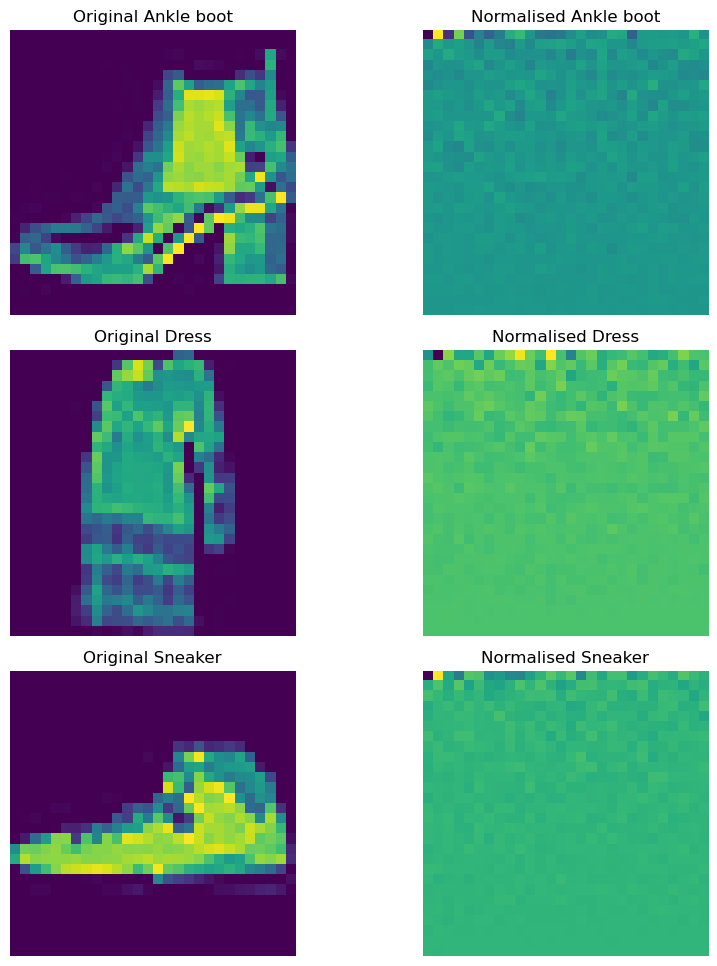

In [95]:
pca_data = []

for e in range (4, 29, 4):
    pca = PCA(n_components= e ** 2)
    train_data_pca = pca.fit_transform(tf.reshape(train_data, shape= (train_data.shape[0], 28 * 28)))
    print(f"Number of components: {e ** 2}")
    plot_normalised_orginal_data(train_data, tf.reshape(train_data_pca, shape= (train_data.shape[0], e, e)))
    pca_data.append(train_data_pca)

print(len(pca_data))

## Checking the best performing model out of the above model created

In [96]:
models = [fashion_model_1, fashion_model_2, fashion_model_3, fashion_model_4, fashion_model_5, fashion_model_6, fashion_model_7,
          fashion_model_8, fashion_model_9, fashion_model_10, fashion_model_11, fashion_model_12, fashion_model_13, fashion_model_14, fashion_model_15, fashion_model_16, fashion_model_17, fashion_model_18, fashion_model_19]

for i, model in enumerate(models):
    print(f"Model: {i + 1}")
    if models.index(model) < models.index(fashion_model_7):
        model.evaluate(test_data, test_labels)
    else:
        model.evaluate(test_data_norm, test_labels)

Model: 1
  1/313 [..............................] - ETA: 8s - loss: 11.9954 - accuracy: 0.8125

313/313 [==============================] - 0s 287us/step - loss: 13.7624 - accuracy: 0.7860
Model: 2
313/313 [==============================] - 0s 274us/step - loss: 1.2536 - accuracy: 0.4613
Model: 3
313/313 [==============================] - 0s 282us/step - loss: 0.8849 - accuracy: 0.6307
Model: 4
313/313 [==============================] - 0s 267us/step - loss: 12.4318 - accuracy: 0.8088
Model: 5
313/313 [==============================] - 0s 270us/step - loss: 0.5602 - accuracy: 0.8206
Model: 6
313/313 [==============================] - 0s 302us/step - loss: 2.3028 - accuracy: 0.1000
Model: 7
313/313 [==============================] - 0s 266us/step - loss: 0.4878 - accuracy: 0.8343
Model: 8
313/313 [==============================] - 0s 262us/step - loss: 0.4942 - accuracy: 0.8289
Model: 9
313/313 [==============================] - 0s 267us/step - loss: 0.4345 - accuracy: 0.8489
Model: 10
313/313 [==============================] - 0s 275us/step - loss: 0.4210 - accuracy: 0.8548
Model:

## Experiment
Model 19, Model 18 are the best performing models our of the above.


Let's try using the other normalisation approaches into the above models and let's see their performance.

The experiement will be as below:
1. Try with Standard scaler normalised data
2. Then try with different pca decomposed data

For each model training we need to reshape the model accordingly.

In [97]:
fashion_model_18.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_17 (Flatten)        (None, 784)               0         
                                                                 
 dense_71 (Dense)            (None, 10)                7850      
                                                                 
 dense_72 (Dense)            (None, 50)                550       
                                                                 
 dense_73 (Dense)            (None, 100)               5100      
                                                                 
 dense_74 (Dense)            (None, 100)               10100     
                                                                 
 dense_75 (Dense)            (None, 50)                5050      
                                                                 
 dense_76 (Dense)            (None, 10)              

In [98]:
tf.random.set_seed(42)
learning_rate = 2e-4

fashion_model_20 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= (28, 28)),
    tf.keras.layers.Dense(10, activation= 'elu'),
    tf.keras.layers.Dense(50, activation= 'elu'),
    tf.keras.layers.Dense(100, activation= 'exponential'),
    tf.keras.layers.Dense(100, activation= 'tanh'),
    tf.keras.layers.Dense(50, activation= 'tanh'),
    tf.keras.layers.Dense(len(class_names), activation= 'softmax')
])

fashion_model_20.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                        optimizer= tf.keras.optimizers.Adam(learning_rate= learning_rate),
                        metrics= ['accuracy'])

fashion_history_20 = fashion_model_20.fit(tf.reshape(train_data_std, shape= train_data.shape), train_labels,
                                        epochs= 20,
                                        validation_data= (tf.reshape(test_data_std, shape= test_data.shape), test_labels))

Epoch 1/20


1875/1875 [==============================] - 1s 640us/step - loss: 0.6206 - accuracy: 0.7825 - val_loss: 0.4816 - val_accuracy: 0.8263
Epoch 2/20
1875/1875 [==============================] - 1s 602us/step - loss: 0.4273 - accuracy: 0.8458 - val_loss: 0.4443 - val_accuracy: 0.8393
Epoch 3/20
1875/1875 [==============================] - 1s 608us/step - loss: 0.3915 - accuracy: 0.8578 - val_loss: 0.4203 - val_accuracy: 0.8473
Epoch 4/20
1875/1875 [==============================] - 1s 602us/step - loss: 0.3700 - accuracy: 0.8659 - val_loss: 0.4126 - val_accuracy: 0.8500
Epoch 5/20
1875/1875 [==============================] - 1s 609us/step - loss: 0.3555 - accuracy: 0.8704 - val_loss: 0.4034 - val_accuracy: 0.8512
Epoch 6/20
1875/1875 [==============================] - 1s 606us/step - loss: 0.3433 - accuracy: 0.8750 - val_loss: 0.3960 - val_accuracy: 0.8528
Epoch 7/20
1875/1875 [==============================] - 1s 595us/step - loss: 0.3336 - accuracy: 0.8783 - val_loss: 0.3969 - val_accura

In [99]:
fashion_model_18.evaluate(test_data_norm, test_labels), fashion_model_20.evaluate(tf.reshape(test_data_std, shape= test_data_std.shape), test_labels)

313/313 [==============================] - 0s 359us/step - loss: nan - accuracy: 0.1000


([0.37116140127182007, 0.8676999807357788], [nan, 0.10000000149011612])

In [100]:
tf.random.set_seed(42)
learning_rate = 2e-4

fashion_model_21 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= (28, 28)),
    tf.keras.layers.Dense(10, activation= 'elu'),
    tf.keras.layers.Dense(50, activation= 'elu'),
    tf.keras.layers.Dense(100, activation= 'exponential'),
    tf.keras.layers.Dense(100, activation= 'tanh'),
    tf.keras.layers.Dense(50, activation= 'tanh'),
    tf.keras.layers.Dense(5, activation= 'relu'),
    tf.keras.layers.Dense(len(class_names), activation= 'softmax')
])

fashion_model_21.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                        optimizer= tf.keras.optimizers.Adam(learning_rate= learning_rate),
                        metrics= ['accuracy'])

fashion_history_21 = fashion_model_21.fit(tf.reshape(train_data_std, shape= train_data.shape), train_labels,
                                        epochs= 20,
                                        validation_data= (tf.reshape(test_data_std, shape= test_data.shape), test_labels))

Epoch 1/20
1875/1875 [==============================] - 2s 641us/step - loss: 1.1531 - accuracy: 0.6306 - val_loss: 0.7383 - val_accuracy: 0.7761
Epoch 2/20
1875/1875 [==============================] - 1s 595us/step - loss: 0.6018 - accuracy: 0.8135 - val_loss: 0.5692 - val_accuracy: 0.8172
Epoch 3/20
1875/1875 [==============================] - 1s 598us/step - loss: 0.4933 - accuracy: 0.8401 - val_loss: 0.5034 - val_accuracy: 0.8348
Epoch 4/20
1875/1875 [==============================] - 1s 607us/step - loss: 0.4343 - accuracy: 0.8558 - val_loss: 0.4697 - val_accuracy: 0.8456
Epoch 5/20
1875/1875 [==============================] - 1s 621us/step - loss: 0.4026 - accuracy: 0.8630 - val_loss: 0.4469 - val_accuracy: 0.8477
Epoch 6/20
1875/1875 [==============================] - 1s 609us/step - loss: 0.3800 - accuracy: 0.8680 - val_loss: 0.4363 - val_accuracy: 0.8491
Epoch 7/20
1875/1875 [==============================] - 1s 617us/step - loss: 0.3654 - accuracy: 0.8722 - val_loss: 0.4200 -

In [101]:
fashion_model_19.evaluate(test_data_norm, test_labels), fashion_model_21.evaluate(tf.reshape(test_data_std, shape= test_data.shape), test_labels)

313/313 [==============================] - 0s 313us/step - loss: 0.4170 - accuracy: 0.8616


([0.39118531346321106, 0.8632000088691711],
 [0.4170496165752411, 0.8615999817848206])

313/313 [==============================] - 0s 284us/step


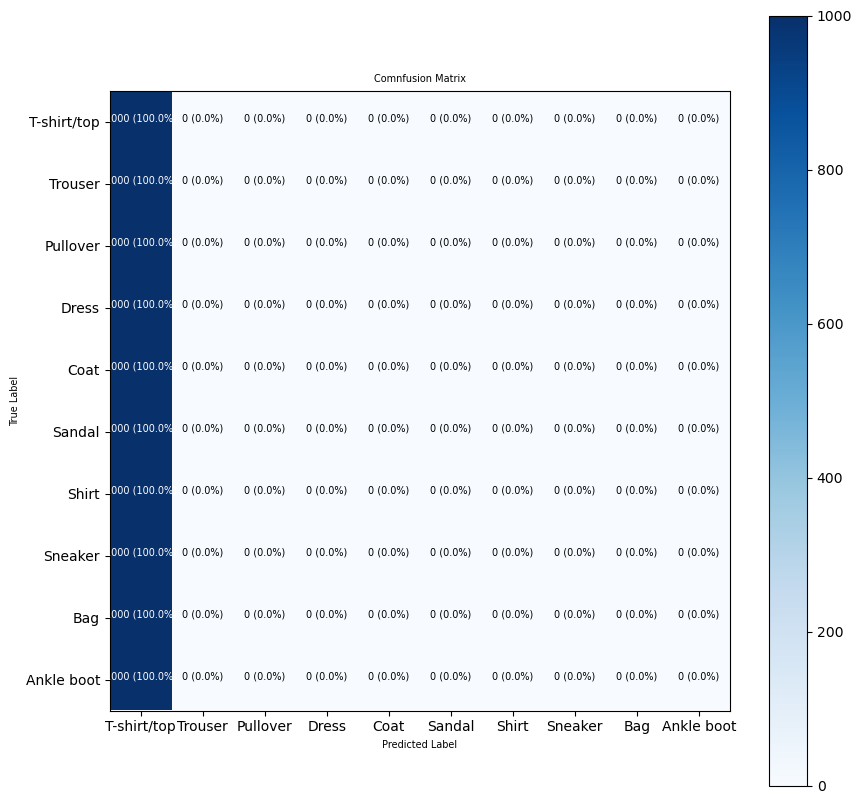

In [102]:
plot_confusion_matrix(test_labels,
                      tf.argmax(fashion_model_20.predict(tf.reshape(test_data_std, shape= test_data.shape)), axis= 1),
                      classes= class_names,
                      text_size= 7)

313/313 [==============================] - 0s 304us/step


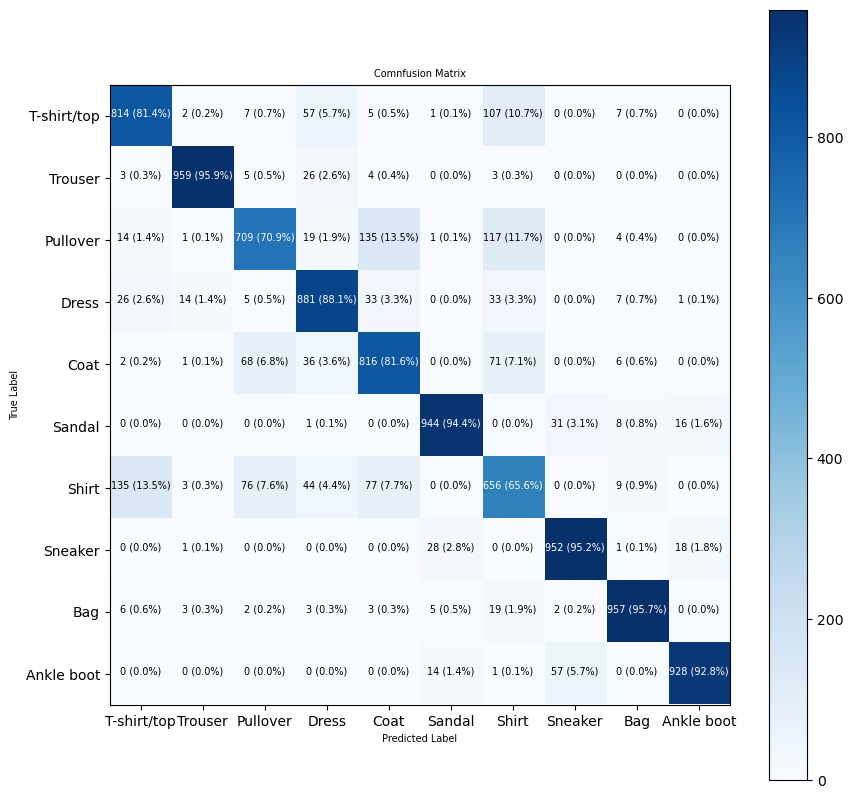

In [103]:
plot_confusion_matrix(test_labels,
                      tf.argmax(fashion_model_21.predict(tf.reshape(test_data_std, shape= test_data.shape)), axis= 1),
                      classes= class_names,
                      text_size= 7)

The issue of classifying Tshirt, Pullover and shirt has not been solved by Standard Scaler normalisation. Let's try with PCA.

In [104]:

def pca_experiment_1():

    for e in range (4, 29, 4):
        pca = PCA(n_components= e ** 2)
        train_data_pca = pca.fit_transform(tf.reshape(train_data_std, shape= (train_data.shape[0], 28 * 28)))
        test_data_pca = pca.transform(tf.reshape(test_data_std, shape= (test_data.shape[0], 28 * 28)))
        print(f"Number of components: {e ** 2}")

        tf.random.set_seed(42)
        learning_rate = 2e-4

        fashion_model_22 = tf.keras.Sequential([
            tf.keras.layers.Flatten(input_shape= (e, e)),
            tf.keras.layers.Dense(10, activation= 'elu'),
            tf.keras.layers.Dense(50, activation= 'elu'),
            tf.keras.layers.Dense(100, activation= 'elu'),
            tf.keras.layers.Dense(100, activation= 'tanh'),
            tf.keras.layers.Dense(50, activation= 'tanh'),
            tf.keras.layers.Dense(len(class_names), activation= 'softmax')
        ])

        fashion_model_22.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                                optimizer= tf.keras.optimizers.Adam(learning_rate= learning_rate),
                                metrics= ['accuracy'])

        fashion_history_22 = fashion_model_22.fit(tf.reshape(train_data_pca, shape= (train_data.shape[0], e, e)), train_labels,
                                                epochs= 20,
                                                validation_data= (tf.reshape(test_data_pca, shape= (test_data.shape[0], e, e)), test_labels),
                                                verbose= 0)
        fashion_model_22.evaluate(tf.reshape(test_data_pca, shape= (test_data.shape[0], e, e)), test_labels)

In [105]:
pca_experiment_1()

Number of components: 16
313/313 [==============================] - 0s 315us/step - loss: 0.4744 - accuracy: 0.8253
Number of components: 64
313/313 [==============================] - 0s 314us/step - loss: 0.4046 - accuracy: 0.8555
Number of components: 144
313/313 [==============================] - 0s 339us/step - loss: 0.3785 - accuracy: 0.8630
Number of components: 256
313/313 [==============================] - 0s 345us/step - loss: 0.3823 - accuracy: 0.8650
Number of components: 400
313/313 [==============================] - 0s 320us/step - loss: 0.3852 - accuracy: 0.8672
Number of components: 576
313/313 [==============================] - 0s 345us/step - loss: 0.3913 - accuracy: 0.8613
Number of components: 784
313/313 [==============================] - 0s 342us/step - loss: 0.4282 - accuracy: 0.8551


In [106]:
def pca_experiment_2():

    for e in range (4, 29, 4):
        pca = PCA(n_components= e ** 2)
        train_data_pca = pca.fit_transform(tf.reshape(train_data_std, shape= (train_data.shape[0], 28 * 28)))
        test_data_pca = pca.transform(tf.reshape(test_data_std, shape= (test_data.shape[0], 28 * 28)))
        print(f"Number of components: {e ** 2}")

        tf.random.set_seed(42)
        learning_rate = 2e-4

        fashion_model_23 = tf.keras.Sequential([
            tf.keras.layers.Flatten(input_shape= (e, e)),
            tf.keras.layers.Dense(10, activation= 'elu'),
            tf.keras.layers.Dense(50, activation= 'elu'),
            tf.keras.layers.Dense(100, activation= 'elu'),
            tf.keras.layers.Dense(100, activation= 'tanh'),
            tf.keras.layers.Dense(50, activation= 'tanh'),
            tf.keras.layers.Dense(5, activation= 'relu'),
            tf.keras.layers.Dense(len(class_names), activation= 'softmax')
        ])

        fashion_model_23.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                                optimizer= tf.keras.optimizers.Adam(learning_rate= learning_rate),
                                metrics= ['accuracy'])

        fashion_history_23 = fashion_model_23.fit(tf.reshape(train_data_pca, shape= (train_data.shape[0], e, e)), train_labels,
                                                epochs= 20,
                                                validation_data= (tf.reshape(test_data_pca, shape= (test_data.shape[0], e, e)), test_labels),
                                                verbose= 0)
        fashion_model_23.evaluate(tf.reshape(test_data_pca, shape= (test_data.shape[0], e, e)), test_labels)

In [107]:
pca_experiment_2()

Number of components: 16
313/313 [==============================] - 0s 317us/step - loss: 0.4826 - accuracy: 0.8234
Number of components: 64
313/313 [==============================] - 0s 320us/step - loss: 0.4219 - accuracy: 0.8511
Number of components: 144
313/313 [==============================] - 0s 321us/step - loss: 0.3918 - accuracy: 0.8607
Number of components: 256
313/313 [==============================] - 0s 328us/step - loss: 0.3994 - accuracy: 0.8613
Number of components: 400
313/313 [==============================] - 0s 342us/step - loss: 0.4007 - accuracy: 0.8589
Number of components: 576
313/313 [==============================] - 0s 337us/step - loss: 0.4219 - accuracy: 0.8612
Number of components: 784
313/313 [==============================] - 0s 369us/step - loss: 0.4623 - accuracy: 0.8507


In [108]:
fashion_model_19.evaluate(test_data_norm, test_labels)

313/313 [==============================] - 0s 333us/step - loss: 0.3912 - accuracy: 0.8632


[0.39118531346321106, 0.8632000088691711]

In [109]:
fashion_model_18.evaluate(test_data_norm, test_labels)

313/313 [==============================] - 0s 328us/step - loss: 0.3712 - accuracy: 0.8677


[0.37116140127182007, 0.8676999807357788]

In [110]:

def pca_experiment_3():

    for e in range (1, 29):
        pca = PCA(n_components= e ** 2)
        train_data_pca = pca.fit_transform(tf.reshape(train_data_std, shape= (train_data.shape[0], 28 * 28)))
        test_data_pca = pca.transform(tf.reshape(test_data_std, shape= (test_data.shape[0], 28 * 28)))
        print(f"Number of components: {e ** 2}")

        tf.random.set_seed(42)
        learning_rate = 2e-4

        fashion_model_22 = tf.keras.Sequential([
            tf.keras.layers.Flatten(input_shape= (e, e)),
            tf.keras.layers.Dense(10, activation= 'elu'),
            tf.keras.layers.Dense(50, activation= 'elu'),
            tf.keras.layers.Dense(100, activation= 'elu'),
            tf.keras.layers.Dense(100, activation= 'tanh'),
            tf.keras.layers.Dense(50, activation= 'tanh'),
            tf.keras.layers.Dense(len(class_names), activation= 'softmax')
        ])

        fashion_model_22.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                                optimizer= tf.keras.optimizers.Adam(learning_rate= learning_rate),
                                metrics= ['accuracy'])

        fashion_history_22 = fashion_model_22.fit(tf.reshape(train_data_pca, shape= (train_data.shape[0], e, e)), train_labels,
                                                epochs= 20,
                                                validation_data= (tf.reshape(test_data_pca, shape= (test_data.shape[0], e, e)), test_labels),
                                                verbose= 0)
        fashion_model_22.evaluate(tf.reshape(test_data_pca, shape= (test_data.shape[0], e, e)), test_labels)

In [111]:
pca_experiment_3()

Number of components: 1
313/313 [==============================] - 0s 297us/step - loss: 1.7822 - accuracy: 0.3134
Number of components: 4
313/313 [==============================] - 0s 331us/step - loss: 0.7016 - accuracy: 0.7223
Number of components: 9
313/313 [==============================] - 0s 335us/step - loss: 0.5305 - accuracy: 0.7956
Number of components: 16
313/313 [==============================] - 0s 326us/step - loss: 0.4717 - accuracy: 0.8240
Number of components: 25
313/313 [==============================] - 0s 320us/step - loss: 0.4424 - accuracy: 0.8336
Number of components: 36
313/313 [==============================] - 0s 310us/step - loss: 0.4317 - accuracy: 0.8391
Number of components: 49
313/313 [==============================] - 0s 326us/step - loss: 0.4037 - accuracy: 0.8514
Number of components: 64
313/313 [==============================] - 0s 337us/step - loss: 0.4069 - accuracy: 0.8521
Number of components: 81
313/313 [==============================] - 0s 351u

In [112]:
def pca_experiment_4():

    for e in range (1, 29):
        pca = PCA(n_components= e ** 2)
        train_data_pca = pca.fit_transform(tf.reshape(train_data_std, shape= (train_data.shape[0], 28 * 28)))
        test_data_pca = pca.transform(tf.reshape(test_data_std, shape= (test_data.shape[0], 28 * 28)))
        print(f"Number of components: {e ** 2}")

        tf.random.set_seed(42)
        learning_rate = 2e-4

        fashion_model_23 = tf.keras.Sequential([
            tf.keras.layers.Flatten(input_shape= (e, e)),
            tf.keras.layers.Dense(10, activation= 'elu'),
            tf.keras.layers.Dense(50, activation= 'elu'),
            tf.keras.layers.Dense(100, activation= 'elu'),
            tf.keras.layers.Dense(100, activation= 'tanh'),
            tf.keras.layers.Dense(50, activation= 'tanh'),
            tf.keras.layers.Dense(5, activation= 'relu'),
            tf.keras.layers.Dense(len(class_names), activation= 'softmax')
        ])

        fashion_model_23.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                                optimizer= tf.keras.optimizers.Adam(learning_rate= learning_rate),
                                metrics= ['accuracy'])

        fashion_history_23 = fashion_model_23.fit(tf.reshape(train_data_pca, shape= (train_data.shape[0], e, e)), train_labels,
                                                epochs= 20,
                                                validation_data= (tf.reshape(test_data_pca, shape= (test_data.shape[0], e, e)), test_labels),
                                                verbose= 0)
        fashion_model_23.evaluate(tf.reshape(test_data_pca, shape= (test_data.shape[0], e, e)), test_labels)

In [113]:
pca_experiment_4()

Number of components: 1
313/313 [==============================] - 0s 316us/step - loss: 1.7841 - accuracy: 0.3138
Number of components: 4
313/313 [==============================] - 0s 332us/step - loss: 0.7165 - accuracy: 0.7161
Number of components: 9
313/313 [==============================] - 0s 351us/step - loss: 0.5486 - accuracy: 0.7898
Number of components: 16
313/313 [==============================] - 0s 358us/step - loss: 0.4907 - accuracy: 0.8181
Number of components: 25
313/313 [==============================] - 0s 370us/step - loss: 0.4597 - accuracy: 0.8342
Number of components: 36
313/313 [==============================] - 0s 359us/step - loss: 0.4535 - accuracy: 0.8347
Number of components: 49
313/313 [==============================] - 0s 351us/step - loss: 0.4539 - accuracy: 0.8408
Number of components: 64
313/313 [==============================] - 0s 329us/step - loss: 0.4141 - accuracy: 0.8509
Number of components: 81
313/313 [==============================] - 0s 341u

Normalisation has not made any progress with the improvement of the model.

We have tried all the aspects to tweak the model but we could not achieve more than 86.5% accuracy.

Let's experiment from the begining in another notebook so that we can do a detailed analysis.